# Comparisons of tree-based classifiers (from exports)

In [261]:
import sys
import os
import re
from os.path import join as opj
from collections import OrderedDict
import numpy as np
import sklearn.metrics
import pandas as pd
from slugify import slugify

app_base_dir = '/home/spbproc/euso-spb-patt-reco-v1'
if app_base_dir not in sys.path:
    sys.path.append(app_base_dir)

from data_analysis_utils_performance import *

In [73]:
data_snippets_dir = 'ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports'
os.makedirs(data_snippets_dir, exist_ok=True)
data_snippets_dir_figures = os.path.join(data_snippets_dir, 'figures')
os.makedirs(data_snippets_dir_figures, exist_ok=True)
data_snippets_dir_data = os.path.join(data_snippets_dir, 'data')
os.makedirs(data_snippets_dir_data, exist_ok=True)

## Compared models

In [286]:
cls_id = '20200415_2'

extra_trees_evaluation = 'ver4_machine_learning_w_labeled_flight_'+cls_id+'_evaluation'
extra_trees_evaluation_data = opj(extra_trees_evaluation, 'data')
extra_trees_model = 'ver4_machine_learning_w_labeled_flight_'+cls_id
extra_trees_model_data = opj(extra_trees_model, 'data')
extra_trees_utah = ('ver4_machine_learning_utah_classification_gtu_overlap_'+cls_id)
extra_trees_utah_data = opj(extra_trees_utah, 'data')

adaboost_evaluation = 'ver4_machine_learning_w_labeled_flight_'+cls_id+'_adaboost_evaluation'
adaboost_evaluation_data = opj(adaboost_evaluation, 'data')
adaboost_model = 'ver4_machine_learning_w_labeled_flight_'+cls_id+'_adaboost'
adaboost_model_data = opj(adaboost_model, 'data')
adaboost_utah = ('ver4_machine_learning_utah_classification_gtu_overlap_'+cls_id+'_adaboost')
adaboost_utah_data = opj(adaboost_utah, 'data')

random_forest_evaluation = 'ver4_machine_learning_w_labeled_flight_'+cls_id+'_randomforest_evaluation'
random_forest_evaluation_data = opj(random_forest_evaluation, 'data')
random_forest_model = 'ver4_machine_learning_w_labeled_flight_'+cls_id+'_randomforest'
random_forest_model_data = opj(adaboost_model, 'data')
random_forest_utah = ('ver4_machine_learning_utah_classification_gtu_overlap_'+cls_id+'_randomforest')
random_forest_utah_data = opj(random_forest_utah, 'data')

cls_dict = dict(
    extra_trees=dict(
        label='Extra trees',
        cls=opj(extra_trees_model, 'extra_trees_cls_on_train_rfecv.pkl'),
        cols=opj(extra_trees_model, 'rfecv_selector_on_extra_trees__column_names.txt'),
        train=dict(
            roc=opj(extra_trees_evaluation_data, 'train_roc_weighted.npz'),
            pr=opj(extra_trees_evaluation_data, 'train_precision_recall_weighted.npz'),
            npz=opj(extra_trees_evaluation, 'events', 'train_learning_data_test.npz')
        ),
        test=dict(
            roc=opj(extra_trees_evaluation_data, 'roc_weighted.npz'),
            pr=opj(extra_trees_evaluation_data, 'precision_recall_weighted.npz'),
            npz=opj(extra_trees_evaluation, 'events', 'learning_data_test.npz')
        ),
        utah=dict(
            roc=opj(extra_trees_utah_data, 'roc_weighted.npz'),
            pr=opj(extra_trees_utah_data, 'precision_recall_weighted.npz'),
            tsv_gz=opj(extra_trees_utah, 'utah_data.tsv.gz'),
            est_column = 'extc_trn_rfecv_est',
            est_proba_column = 'extc_trn_rfecv_proba'
        )
    ),
    adaboost=dict(
        label='AdaBoost',
        cls=opj(adaboost_model, 'adaboost_d_8_s_50_l_10_cls_on_train_rfecv_s_25.pkl'),
        cols=opj(adaboost_model, 'rfecv_selector_on_adaboost_d_8_s_50_l_10__column_names.txt'),
        train=dict(
            roc=opj(adaboost_evaluation_data, 'train_roc_weighted.npz'),
            pr=opj(adaboost_evaluation_data, 'train_precision_recall_weighted.npz'),
            npz=opj(adaboost_evaluation, 'events', 'train_learning_data_test.npz')
        ),
        test=dict(
            roc=opj(adaboost_evaluation_data, 'roc_weighted.npz'),
            pr=opj(adaboost_evaluation_data, 'precision_recall_weighted.npz'),
            npz=opj(adaboost_evaluation, 'events', 'learning_data_test.npz')
        ),
        utah=dict(
            roc=opj(adaboost_utah_data, 'roc_weighted.npz'),
            pr=opj(adaboost_utah_data, 'precision_recall_weighted.npz'),
            tsv_gz=opj(adaboost_utah, 'utah_data.tsv.gz'),
            est_column = 'adaboost_trn_rfecv_est',
            est_proba_column = 'adaboost_trn_rfecv_proba'
        )
    ),
    randomforest=dict(
        label='Random Forest',
        cls=opj(random_forest_model, 'randomforest_cls_on_train_rfecv_s_1.pkl'),
        cols=opj(random_forest_model, 'rfecv_selector_on_randomforest__column_names.txt'),
        train=dict(
            roc=opj(random_forest_evaluation_data, 'train_roc_weighted.npz'),
            pr=opj(random_forest_evaluation_data, 'train_precision_recall_weighted.npz'),
            npz=opj(random_forest_evaluation, 'events', 'train_learning_data_test.npz')
        ),
        test=dict(
            roc=opj(random_forest_evaluation_data, 'roc_weighted.npz'),
            pr=opj(random_forest_evaluation_data, 'precision_recall_weighted.npz'),
            npz=opj(random_forest_evaluation, 'events', 'learning_data_test.npz')
        ),
        utah=dict(
            roc=opj(random_forest_utah_data, 'roc_weighted.npz'),
            pr=opj(random_forest_utah_data, 'precision_recall_weighted.npz'),
            tsv_gz=opj(random_forest_utah, 'utah_data.tsv.gz'),
            est_column = 'rndfrst_trn_rfecv_est',
            est_proba_column = 'rndfrst_trn_rfecv_proba'
        )
    ),
)

feature_scores = dict(
    extra_trees=dict(
        label='Extra trees',
        all_tsv=opj(extra_trees_model, 'learning_data__all_var_th_sc_columns_sorted_table.tsv'),
        all_outer_tsv=opj(extra_trees_model, 'learning_data__all_var_th_sc_columns_sorted_table_outer.tsv'),
        rfecv_outer_tsv=opj(extra_trees_model, 'learning_data__rfecv_var_th_sc_columns_sorted_table_outer.tsv'),
        rfecv_tsv=opj(extra_trees_model, 'learning_data__rfecv_var_th_sc_columns_sorted_table.tsv'),
    ),
    adaboost=dict(
        label='AdaBoost',
        all_tsv=opj(adaboost_model, 'learning_data__all_var_th_sc_columns_sorted_table.tsv'),
        all_outer_tsv=opj(adaboost_model, 'learning_data__all_var_th_sc_columns_sorted_table_outer.tsv'),
        rfecv_outer_tsv=opj(adaboost_model, 'learning_data__rfecv_on_adaboost_d_8_s_50_l_10_var_th_sc_columns_sorted_table__outer.tsv'), 
        rfecv_tsv=opj(adaboost_model, 'learning_data__rfecv_on_adaboost_d_8_s_50_l_10_var_th_sc_columns_sorted_table.tsv'),
    ),
    randomforest=dict(
        label='Random Forest',
        all_tsv=opj(random_forest_model, 'learning_data__all_var_th_sc_columns_sorted_table.tsv'),
        all_outer_tsv=opj(random_forest_model, 'learning_data__all_var_th_sc_columns_sorted_table_outer.tsv'),
        rfecv_outer_tsv=opj(random_forest_model, 'learning_data__rfecv_var_th_sc_columns_sorted_table_outer.tsv'), 
        rfecv_tsv=opj(random_forest_model, 'learning_data__rfecv_var_th_sc_columns_sorted_table.tsv'),
    ),
    
)

In [250]:
for cls_name, s in cls_dict.items():
    for p in ['cls', 'cols']:
        print('{:<15} {:<6} {:<6} {:<120} {:<4}'.format(cls_name, p, '', s[p], os.path.exists(s[p])))
    for p in ['test', 'utah']:
        for pp in ['roc', 'pr', 'tsv_gz', 'npz']:
            if pp not in s[p]:
                continue
            i_path = s[p][pp]
            print('{:<15} {:<6} {:<6} {:<120} {:<4}'.format(cls_name, p,  pp, i_path, os.path.exists(i_path)))

print('-'*100)            
            
for cls_name, s in feature_scores.items():
    for p in ['all_tsv', 'all_outer_tsv', 'rfecv_outer_tsv', 'rfecv_tsv']:
        if p not in s:
            continue
        print('{:<15} {:<15} {:<120} {:<4}'.format(cls_name, p, s[p], os.path.exists(s[p])))

extra_trees     cls           ver4_machine_learning_w_labeled_flight_20200415_2/extra_trees_cls_on_train_rfecv.pkl                                     1   
extra_trees     cols          ver4_machine_learning_w_labeled_flight_20200415_2/rfecv_selector_on_extra_trees__column_names.txt                        1   
extra_trees     test   roc    ver4_machine_learning_w_labeled_flight_20200415_2_evaluation/data/roc_weighted.npz                                       1   
extra_trees     test   pr     ver4_machine_learning_w_labeled_flight_20200415_2_evaluation/data/precision_recall_weighted.npz                          1   
extra_trees     test   npz    ver4_machine_learning_w_labeled_flight_20200415_2_evaluation/events/learning_data_test.npz                               1   
extra_trees     utah   roc    ver4_machine_learning_utah_classification_gtu_overlap_20200415_2/data/roc_weighted.npz                                   1   
extra_trees     utah   pr     ver4_machine_learning_utah_classif

In [231]:
%%bash
wc -l ver4_machine_learning_w_labeled_flight_20200415_2_randomforest/learning_data__rfecv_var_th_sc_columns_sorted_table.tsv

82 ver4_machine_learning_w_labeled_flight_20200415_2_randomforest/learning_data__rfecv_var_th_sc_columns_sorted_table.tsv


## Constants

In [32]:
# manual_classification_class_name_column = 'manual_classification_class_name'
# manual_classification_class_label_column = 'manual_classification_class_label'
# manual_classification_class_number_column_base = 'class_number'

manual_classification_class_number_column='manual_classification_class_number'

EVENT_CLASS_NUMBER_UNLABELED = -1
EVENT_CLASS_NUMBER_UNLABELED_NOISE = -2
EVENT_CLASS_LABLELED_NOISE_FLIGHT = -3  # in case of reduced classification

In [33]:
EVENT_CLASSES = {
    'pixel': 2,
    'top_left_ec': 5,
    'blob': 12,
    'large_blob': 11,
    'short_single_gtu_track': 7,
    'single_gtu_track': 3,
    'noise': 1,
    'cartesian_line': 4,
    'strong_pmt_edge': 9,
    'few_pixels': 6,
    'bg_increased_suddenly': 10,
    'persistent_pixel': 14,
    'noise_unspecified': 0,
    'unspecified': 8,
    'shower': 13,
    '2pix_line': 15,
    'bright_blob': 16,
    'blob_and_pixels': 17,
    'pixel_w_blob_behind': 18,
    'storng_light': 19,
    'sparse_blobs': 20,
    'noise_with_weak_pixel': 21,
    #
    'unclassified': -1
}

EVENT_CLASSES_LABELS = {
    'Pixel': 2,
    'Top-left EC': 5,
    'Blob': 12,
    'Large blob': 11,
    'Short single GTU track': 7,
    'Single GTU track': 3,
    'Noise': 1,
    'Cartesian line': 4,
    'Strong MA-PMT edge': 9,
    'Few pixels': 6,
    'Sudden bg. increased': 10,
    'Persistent pixel': 14,
    'Unspecified noise': 0,
    'Unspecified': 8,
    'Air shower': 13,
    '2 pix line': 15,
    'Bright blob': 16,
    'Blob and pixels': 17,
    'Pixel with a blob behind': 18,
    'Storng light': 19,
    'Sparse blobs': 20,
    'Noise with a weak pixel': 21,
    #
    'Unclassified': -1
}

INVERSE_EVENT_CLASSES = {v: k for k, v in EVENT_CLASSES.items()}
INVERSE_EVENT_CLASSES_LABELS = {v: k for k, v in EVENT_CLASSES_LABELS.items()}

## Functions

### Classification report

In [111]:
def classification_report__w_output_dict(y_true, y_pred, labels=None, target_names=None,
                          sample_weight=None, digits=2, output_dict=False,
                          zero_division="warn"):
    """backporting function from newer sklearn
    """
    
    ###
    
    from inspect import signature
    from sklearn.metrics import precision_recall_fscore_support, classification_report
    
    if 'output_dict' in signature(classification_report).parameters:
        return classification_report(
            y_true, y_pred, labels=labels, target_names=target_names,
                          sample_weight=sample_weight, digits=2, output_dict=False,
                          zero_division="warn"
        )
    
    if hasattr(sklearn.metrics, 'classification'):
        from sklearn.metrics.classification import _check_targets
    else:
        from sklearn.metrics._classification import _check_targets  # untested

    from sklearn.utils.multiclass import unique_labels
    
    ###
    
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)

    labels_given = True
    if labels is None:
        labels = unique_labels(y_true, y_pred)
        labels_given = False
    else:
        labels = np.asarray(labels)

    # labelled micro average
    micro_is_accuracy = ((y_type == 'multiclass' or y_type == 'binary') and
                         (not labels_given or
                          (set(labels) == set(unique_labels(y_true, y_pred)))))

    if target_names is not None and len(labels) != len(target_names):
        if labels_given:
            warnings.warn(
                "labels size, {0}, does not match size of target_names, {1}"
                .format(len(labels), len(target_names))
            )
        else:
            raise ValueError(
                "Number of classes, {0}, does not match size of "
                "target_names, {1}. Try specifying the labels "
                "parameter".format(len(labels), len(target_names))
            )
    if target_names is None:
        target_names = ['%s' % l for l in labels]

    headers = ["precision", "recall", "f1-score", "support"]
    # compute per-class results without averaging
    p, r, f1, s = precision_recall_fscore_support(y_true, y_pred,
                                                  labels=labels,
                                                  average=None,
                                                  sample_weight=sample_weight,
                                                  ) # zero_division=zero_division
    rows = zip(target_names, p, r, f1, s)

    if y_type.startswith('multilabel'):
        average_options = ('micro', 'macro', 'weighted', 'samples')
    else:
        average_options = ('micro', 'macro', 'weighted')

    if output_dict:
        report_dict = {label[0]: label[1:] for label in rows}
        for label, scores in report_dict.items():
            report_dict[label] = dict(zip(headers,
                                          [i.item() for i in scores]))
    else:
        longest_last_line_heading = 'weighted avg'
        name_width = max(len(cn) for cn in target_names)
        width = max(name_width, len(longest_last_line_heading), digits)
        head_fmt = '{:>{width}s} ' + ' {:>9}' * len(headers)
        report = head_fmt.format('', *headers, width=width)
        report += '\n\n'
        row_fmt = '{:>{width}s} ' + ' {:>9.{digits}f}' * 3 + ' {:>9}\n'
        for row in rows:
            report += row_fmt.format(*row, width=width, digits=digits)
        report += '\n'

    # compute all applicable averages
    for average in average_options:
        if average.startswith('micro') and micro_is_accuracy:
            line_heading = 'accuracy'
        else:
            line_heading = average + ' avg'

        # compute averages with specified averaging method
        avg_p, avg_r, avg_f1, _ = precision_recall_fscore_support(
            y_true, y_pred, labels=labels,
            average=average, sample_weight=sample_weight,
            ) # zero_division=zero_division
        avg = [avg_p, avg_r, avg_f1, np.sum(s)]

        if output_dict:
            report_dict[line_heading] = dict(
                zip(headers, [i.item() for i in avg]))
        else:
            if line_heading == 'accuracy':
                row_fmt_accuracy = '{:>{width}s} ' + \
                        ' {:>9.{digits}}' * 2 + ' {:>9.{digits}f}' + \
                        ' {:>9}\n'
                report += row_fmt_accuracy.format(line_heading, '', '',
                                                  *avg[2:], width=width,
                                                  digits=digits)
            else:
                report += row_fmt.format(line_heading, *avg,
                                         width=width, digits=digits)

    if output_dict:
        if 'accuracy' in report_dict.keys():
            report_dict['accuracy'] = report_dict['accuracy']['precision']
        return report_dict
    else:
        return report

    
def calc_cls_scores_dict(
        y_test, y_test_pred, w_test, source_class_test, EVENT_CLASS_LABLELED_NOISE_FLIGHT=EVENT_CLASS_LABLELED_NOISE_FLIGHT,
        positive='1.0', negative='0.0'
):
    confusion_matrix = sklearn.metrics.confusion_matrix(
        y_test, 
        y_test_pred)
    
    # support for w_test=None should be implemented
    
    cls_report_dict = classification_report__w_output_dict(y_test, y_test_pred, output_dict=True)
    
    if w_test is not None:
        cls_report_weighted_dict = classification_report__w_output_dict(y_test, y_test_pred, sample_weight=w_test, output_dict=True)
    
    if source_class_test is not None:
        learning_data__lbl_noise_flight_mask_arr_test = \
            source_class_test == EVENT_CLASS_LABLELED_NOISE_FLIGHT

        labeled_data_cls_stats = \
            calc_labeled_data_cls_stats(
                mask_arr_test=learning_data__lbl_noise_flight_mask_arr_test,
                y_test=y_test,
                y_test_pred=y_test_pred)
    
    
    # use Python 3.6+ to keep dict order

    cls_scores_dict = OrderedDict()
    
    cls_scores_dict[''] = {
        '# true positive': confusion_matrix[1,1],
        '# false negative': confusion_matrix[1,0],
        '# true negative': confusion_matrix[0,0],
        '# false positive': confusion_matrix[0,1],
    }
    
    cls_scores_dict['equal'] = {
        'precision': cls_report_dict[positive]['precision'],
        'sensitivity': cls_report_dict[positive]['recall'],
        'f1 score (positive)': cls_report_dict[positive]['f1-score'],
        'negative pred. val.': cls_report_dict[negative]['precision'],
        'specificity': cls_report_dict[negative]['recall'],
        'f1 score (negative)': cls_report_dict[negative]['f1-score'],
        'accuracy': cls_report_dict['accuracy'],
    } 
    
    if w_test is not None:
        cls_scores_dict['balanced'] = {
            'precision': cls_report_weighted_dict[positive]['precision'],
            'sensitivity': cls_report_weighted_dict[positive]['recall'],
            'f1 score (positive)': cls_report_weighted_dict[positive]['f1-score'],
            'negative pred. val.': cls_report_weighted_dict[negative]['precision'],
            'specificity': cls_report_weighted_dict[negative]['recall'],
            'f1 score (negative)': cls_report_weighted_dict[negative]['f1-score'],
            'accuracy': cls_report_weighted_dict['accuracy'],
#             'CV mean accuracy': (
#                 np.mean(extra_trees_cls_on_train_rfecv_for_crossvalidation_crv_results),
#                 np.std(extra_trees_cls_on_train_rfecv_for_crossvalidation_crv_results),
#             )
        }
    
    if source_class_test is not None:
        cls_scores_dict['only labeled noise'] = {
            '# negative': labeled_data_cls_stats['num_negative'],
            '# true negative': labeled_data_cls_stats['num_true_negative'],
            '# false positive': labeled_data_cls_stats['num_false_positive'],
            'specificity': labeled_data_cls_stats['specificity'],
            'fallout': labeled_data_cls_stats['fallout'],
#             'CV mean specificity': (
#                 np.mean(extra_trees_cls_on_train_rfecv_for_crossvalidation_lbl_noise_flight_crv_results),
#                 np.std(extra_trees_cls_on_train_rfecv_for_crossvalidation_lbl_noise_flight_crv_results),
#             )
        }
        
    return cls_scores_dict

def calc_cls_scores_dict_utah(
        y_test, y_test_pred, w_test, source_class_test=None, EVENT_CLASS_LABLELED_NOISE_FLIGHT=EVENT_CLASS_LABLELED_NOISE_FLIGHT,
        positive='1', negative='0'
):
    return calc_cls_scores_dict(
        y_test, y_test_pred, w_test, source_class_test, EVENT_CLASS_LABLELED_NOISE_FLIGHT, positive, negative
    )


def print_cls_scores_dict(
        cls_scores_dict,
        line_format = r'{wp:<25} & {prop:<25} & {val_str:<20} \\',
        val_num_format = '{:<5d}',
        val_fraction_format = r'\SI{{{:<.1f}}}{{\percent}}',
        val_fraction_tuple_format = r'\num{{{:<.1f}}} $\pm$ \SI{{{:<.1f}}}{{\percent}}',
        fraction_as_percent = True,
        prop_format_func=lambda p: p.replace('#', '\#')
):

    for weighting_preselection, vals_dict in cls_scores_dict.items():
        for prop, val in vals_dict.items():
            if prop.startswith('#'):
                val_str = val_num_format.format(val)
            elif isinstance(val, (list, tuple)):
                mult = 100 if fraction_as_percent else 1
                val_str = val_fraction_tuple_format.format(*[v*mult for v in val])
            else:
                val_str = val_fraction_format.format(val*100 if fraction_as_percent else val)
            if callable(prop_format_func):
                prop = prop_format_func(prop)
            print(line_format.format(
                wp=weighting_preselection,
                prop=prop,
                val_str=val_str
            ))
    

def print_cls_scores_dict_from_results(
        y_test, y_test_pred, w_test, source_class_test,
        line_format = r'{wp:<25} & {prop:<25} & {val_str:<20} \\',
        val_num_format = '{:<5d}',
        val_fraction_format = r'\SI{{{:<.1f}}}{{\percent}}',
        val_fraction_tuple_format = r'\num{{{:<.1f}}} $\pm$ \SI{{{:<.1f}}}{{\percent}}',
        fraction_as_percent = True,
        prop_format_func=lambda p: p.replace('#', '\#'),
        positive='1.0', negative='0.0'
):
    print_cls_scores_dict(
        calc_cls_scores_dict(y_test, y_test_pred, w_test, source_class_test),
        line_format,
        val_num_format,
        val_fraction_format,
        val_fraction_tuple_format,
        fraction_as_percent,
        prop_format_func
    )

def print_cls_scores_dict_from_results_utah(
        y_test, y_test_pred, w_test, source_class_test=None,
        line_format = r'{wp:<25} & {prop:<25} & {val_str:<20} \\',
        val_num_format = '{:<5d}',
        val_fraction_format = r'\SI{{{:<.1f}}}{{\percent}}',
        val_fraction_tuple_format = r'\num{{{:<.1f}}} $\pm$ \SI{{{:<.1f}}}{{\percent}}',
        fraction_as_percent = True,
        prop_format_func=lambda p: p.replace('#', '\#'), positive='1', negative='0'
):
    print_cls_scores_dict(
        calc_cls_scores_dict_utah(y_test, y_test_pred, w_test, source_class_test, positive=positive, negative=negative),
        line_format,
        val_num_format,
        val_fraction_format,
        val_fraction_tuple_format,
        fraction_as_percent,
        prop_format_func
    )    
    
def get_utah_labeled_subsets(
    utah_df_nonan, manual_classification_class_number_column='manual_classification_class_number',
    EVENT_CLASSES=EVENT_CLASSES
):
    utah_cls_any_df = \
        utah_df_nonan[
                ~utah_df_nonan[manual_classification_class_number_column].isin([
                    EVENT_CLASSES['unclassified'], EVENT_CLASSES['unspecified']
                ])
        ]
    
    utah_cls_shower_df = \
        utah_df_nonan[
            utah_df_nonan[manual_classification_class_number_column] == EVENT_CLASSES['shower']
        ]
    
    utah_cls_any_noise_df = \
        utah_df_nonan[
            ~utah_df_nonan[manual_classification_class_number_column].isin([
                EVENT_CLASSES['shower'], EVENT_CLASSES['unspecified'], EVENT_CLASSES['unclassified']
            ])
        ]
    
    return utah_cls_any_df, utah_cls_shower_df, utah_cls_any_noise_df


def get_y_utah_from_cls_any_df(
    utah_cls_any_df, manual_classification_class_number_column='manual_classification_class_number',
    EVENT_CLASSES=EVENT_CLASSES
):    
    return (utah_cls_any_df[manual_classification_class_number_column] == EVENT_CLASSES['shower']).values.astype(np.uint8)
    
    
def get_y_utah_from_df(
    utah_df, manual_classification_class_number_column='manual_classification_class_number',
    EVENT_CLASSES=EVENT_CLASSES
):
    utah_cls_any_df, utah_cls_shower_df, utah_cls_any_noise_df = \
        get_utah_labeled_subsets(utah_df, manual_classification_class_number_column, EVENT_CLASSES)

    y_utah = get_y_utah_from_cls_any_df(utah_cls_any_df, manual_classification_class_number_column, EVENT_CLASSES)
    
    return y_utah


def get_w_utah(
        utah_cls_any_df, utah_cls_shower_df, utah_cls_any_noise_df, 
        manual_classification_class_number_column='manual_classification_class_number',
        EVENT_CLASSES=EVENT_CLASSES):
    cls_weights_arr = np.ones(len(utah_cls_any_df))
    cls_weights_arr[(utah_cls_any_df[manual_classification_class_number_column] != EVENT_CLASSES['shower']).values] = \
        len(utah_cls_shower_df) / len(utah_cls_any_noise_df)
    return cls_weights_arr


# def get_utah_cls_subsets(utah_cls_any_noise_df, utah_cls_shower_df, est_column):
    
#     utah_cls_any_noise_est_shower_df = utah_cls_any_noise_df[utah_cls_any_noise_df[est_column] == 1]
#     utah_cls_any_noise_est_noise_df = utah_cls_any_noise_df[utah_cls_any_noise_df[est_column] == 0]
    
#     utah_cls_shower_est_shower_df = utah_cls_shower_df[utah_cls_shower_df[est_column] == 1]
#     utah_cls_shower_est_noise_df = utah_cls_shower_df[utah_cls_shower_df[est_column] == 0]  
    
#     return utah_cls_any_noise_est_shower_df, utah_cls_any_noise_est_noise_df, utah_cls_shower_est_shower_df, utah_cls_shower_est_noise_df

### ROC / Prection-Recall

In [112]:
def vis_roc(y, y_pred_proba, w, prefix='', output_dir=data_snippets_dir_figures, ret_05=False, mark_05_i=True):
    
    if prefix and not prefix.endswith('_'):
        prefix += '_'
    
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(y, y_pred_proba)
    auc_non_weighted = sklearn.metrics.roc_auc_score(y, y_pred_proba)

    print('AUC (non-weighted):', auc_non_weighted)    

    print(np.max(thresholds), np.min(thresholds))
    print(thresholds)
        
    max_i = np.argmax((1-fpr) + tpr)
    half_i = np.argmin(np.abs(thresholds - 0.5))
    
    print('Non-weighted')
    print('max_i', max_i)
    print('max    TPR:', tpr[max_i])
    print('max    FPR:', fpr[max_i])
    print('max    threshold:', thresholds[max_i])
    print('half_i', half_i)
    print('th=0.5 TPR:', tpr[half_i])
    print('th=0.5 FPR:', fpr[half_i])
    print('th=0.5 threshold:', thresholds[half_i])

    
    print('-'*100)
        
    if w is not None:
        fpr_weighted, tpr_weighted, thresholds_weighted = \
            sklearn.metrics.roc_curve(y, y_pred_proba, sample_weight=w)
        auc_weighted = sklearn.metrics.roc_auc_score(y, y_pred_proba, sample_weight=w)

        print('AUC (weighted):    ', auc_weighted)
        
        max_i_weighted = np.argmax((1-fpr_weighted) + tpr_weighted)
        half_i_weighted = np.argmin(np.abs(thresholds_weighted - 0.5))
        
        print('Weighted')
        print('max_i', max_i_weighted)
        print('max    TPR:', tpr_weighted[max_i_weighted])
        print('max    FPR:', fpr_weighted[max_i_weighted])
        print('max    threshold:', thresholds_weighted[max_i_weighted])
        print('half_i', half_i)
        print('th=0.5 TPR:', tpr_weighted[half_i_weighted])
        print('th=0.5 FPR:', fpr_weighted[half_i_weighted])
        print('th=0.5 threshold:', thresholds_weighted[half_i_weighted])

        print('-'*100)
        
    else:
        fpr_weighted, tpr_weighted, thresholds_weighted = None, None, None
        auc_weighted = None
        max_i_weighted = None
    
    for xlim, ylim in (((-0.1, 1.1), (0, 1.1)), ((-0.02, 0.3), (0.8, 1.01) )):

        xlim_suffix_str = '_x_{:.2f}_{:.2f}_y_{:.2f}_{:.2f}'.format(*xlim, *ylim).replace('.', '')

        print('ROC curve (non-weighted)')

        for do_point in (False, True):
            suffix = '_marked_thresh' if do_point else ''
            
            fig, ax = plt.subplots(figsize=(3,3))
            ax.plot(fpr, tpr, color='C0', drawstyle="steps-post")
            ax.plot([-2, 2], [-2, 2], linestyle='--', color='silver')
            ax.grid(linestyle=':')
            ax.set_ylim(ylim)
            ax.set_xlim(xlim)
            if do_point:
                ax.plot(fpr[max_i], tpr[max_i], marker='o', color='C0')
                if mark_05_i:
                    ax.plot(fpr[half_i], tpr[half_i], marker='+', color='C0', markersize=12)
            ax.set_xlabel('False positive rate')
            ax.set_ylabel('True positive rate')
            ax.text(0.5, 0.5, 'AUC = {:.3f}'.format(auc_non_weighted), color='C0', 
                    horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
            
            p = os.path.join(output_dir, '{}roc{}{}.svg'.format(prefix, suffix, xlim_suffix_str))
            print('SAVING FIGURE:', p)
            fig.savefig(p)
            
            plt.show()

        
        if w is not None:

            for do_point in (False, True):
                suffix = '_marked_thresh' if do_point else ''
                
                print('ROC curve (weighted)')

                fig, ax = plt.subplots(figsize=(3,3))
                ax.plot(fpr_weighted, tpr_weighted, color='C1', drawstyle="steps-post")
                ax.plot([-2, 2], [-2, 2], linestyle='--', color='silver')
                ax.grid(linestyle=':')
                ax.set_ylim(ylim)
                ax.set_xlim(xlim)
                if do_point:
                    ax.plot(fpr_weighted[max_i_weighted], tpr_weighted[max_i_weighted], marker='o', color='C1')
                    ax.plot(fpr_weighted[half_i_weighted], tpr_weighted[half_i_weighted], marker='+', color='C1', markersize=12)
                ax.set_xlabel('False positive rate')
                ax.set_ylabel('True positive rate')
                ax.text(0.5, 0.5, 'AUC = {:.3f}'.format(auc_weighted), color='C1', 
                        horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
            
                p = os.path.join(output_dir, '{}roc_weighted{}{}.svg'.format(prefix, suffix, xlim_suffix_str))
                print('SAVING FIGURE:', p)
                fig.savefig(p)
                
                plt.show()
                
                print('ROC curve (weighted, non-weighted)')

                fig, ax = plt.subplots(figsize=(3,3))
                ax.plot(fpr, tpr, color='C0', drawstyle="steps-post", label='Non-weighted ({:.3f})'.format(auc_non_weighted))
                ax.plot(fpr_weighted, tpr_weighted, color='C1', drawstyle="steps-post", label='Weighted ({:.3f})'.format(auc_weighted))
                if do_point:
                    ax.plot(fpr[max_i], tpr[max_i], marker='o', color='C0')
                    ax.plot(fpr_weighted[max_i_weighted], tpr_weighted[max_i_weighted], marker='o', color='C1')
                    if mark_05_i:
                        ax.plot(fpr[half_i], tpr[half_i], marker='+', color='C0')
                    ax.plot(fpr_weighted[half_i_weighted], tpr_weighted[half_i_weighted], marker='+', color='C1', markersize=12)
                ax.grid(linestyle=':')
                ax.plot([-2, 2], [-2, 2], linestyle='--', color='silver')
                ax.set_ylim(ylim)
                ax.set_xlim(xlim)
                ax.set_xlabel('False positive rate')
                ax.set_ylabel('True positive rate')
                ax.legend(loc='lower right')
                
                p = os.path.join(output_dir, '{}roc_weighted_comparison{}{}_3x3.svg'.format(prefix, suffix, xlim_suffix_str))
                print('SAVING FIGURE:', p)
                fig.savefig(p)
                
                plt.show()

                fig, ax = plt.subplots(figsize=(4,3))
                ax.plot(fpr, tpr, color='C0', drawstyle="steps-post", label='Non-weighted (AUC={:.3f})'.format(auc_non_weighted))
                ax.plot(fpr_weighted, tpr_weighted, color='C1', drawstyle="steps-post", label='Weighted (AUC={:.3f})'.format(auc_weighted))
                if do_point:
                    ax.plot(fpr[max_i], tpr[max_i], marker='o', color='C0')
                    ax.plot(fpr_weighted[max_i_weighted], tpr_weighted[max_i_weighted], marker='o', color='C1')
                    if mark_05_i:
                        ax.plot(fpr[half_i], tpr[half_i], marker='+', color='C0')
                    ax.plot(fpr_weighted[half_i_weighted], tpr_weighted[half_i_weighted], marker='+', color='C1', markersize=12)
                ax.grid(linestyle=':')
                ax.plot([-2, 2], [-2, 2], linestyle='--', color='silver')
                ax.set_ylim(ylim)
                ax.set_xlim(xlim)
                ax.set_xlabel('False positive rate')
                ax.set_ylabel('True positive rate')
                ax.legend(loc='lower right')
                
                p = os.path.join(output_dir, '{}roc_weighted_comparison{}{}.svg'.format(prefix, suffix, xlim_suffix_str))
                print('SAVING FIGURE:', p)
                fig.savefig(p)
                
                plt.show()
    
    if ret_05:
        return (fpr, tpr, thresholds, auc_non_weighted, max_i, half_i), \
            (fpr_weighted, tpr_weighted, thresholds_weighted, auc_weighted, max_i_weighted, half_i_weighted)
    else:
        return (fpr, tpr, thresholds, auc_non_weighted, max_i), \
            (fpr_weighted, tpr_weighted, thresholds_weighted, auc_weighted, max_i_weighted)



def vis_roc_comparison(
    fpr_a, tpr_a, auc_a, max_i_a, label_a,
    fpr_b, tpr_b, auc_b, max_i_b, label_b,
    output_dir=data_snippets_dir_figures,
    prefix=''
):
    if prefix and not prefix.endswith('_'):
        prefix += '_'
    filename_label = '{}_{}'.format(label_a.lower(), label_b.lower()).replace(' ', '_')

    for xlim, ylim in (((-0.1, 1.1), (0, 1.1)), ((-0.02, 0.3), (0.8, 1.01) )):
        for do_point in (False, True):
            suffix = '_marked_thresh' if do_point else ''

            xlim_suffix_str = '_x_{:.2f}_{:.2f}_y_{:.2f}_{:.2f}'.format(*xlim, *ylim).replace('.', '')

            fig, ax = plt.subplots(figsize=(3,3))
            ax.plot(fpr_a, tpr_a, color='C0', label='{} ({:.3f})'.format(label_a, auc_a))
            ax.plot(fpr_b, tpr_b, color='C1', label='{} ({:.3f})'.format(label_b, auc_b))
            if do_point:
                ax.plot(fpr_a[max_i_a], tpr_a[max_i_a], marker='o', color='C0')
                ax.plot(fpr_b[max_i_b], tpr_b[max_i_b], marker='o', color='C1')
            ax.grid(linestyle=':')
            ax.plot([-2, 2], [-2, 2], linestyle='--', color='silver')
            ax.set_ylim(ylim)
            ax.set_xlim(xlim)
            ax.set_xlabel('False positive rate')
            ax.set_ylabel('True positive rate')
            ax.legend(loc='lower right')
            
            p = os.path.join(output_dir, '{}roc_{}_comparison{}{}_3x3.svg'.format(prefix, filename_label, suffix, xlim_suffix_str))
            print('SAVING FIGURE:', p)
            fig.savefig(p)
                
            plt.show()

            fig, ax = plt.subplots(figsize=(3.5,3))
            ax.plot(fpr_a, tpr_a, color='C0', label='{} (AUC={:.3f})'.format(label_a, auc_a))
            ax.plot(fpr_b, tpr_b, color='C1', label='{} (AUC={:.3f})'.format(label_b, auc_b))
            if do_point:
                ax.plot(fpr_a[max_i_a], tpr_a[max_i_a], marker='o', color='C0')
                ax.plot(fpr_b[max_i_b], tpr_b[max_i_b], marker='o', color='C1')
            ax.grid(linestyle=':')
            ax.plot([-2, 2], [-2, 2], linestyle='--', color='silver')
            ax.set_ylim(ylim)
            ax.set_xlim(xlim)
            ax.set_xlabel('False positive rate')
            ax.set_ylabel('True positive rate')
            ax.legend(loc='lower right')
            
            p = os.path.join(output_dir, '{}roc_{}_comparison{}{}.svg'.format(prefix, filename_label, suffix, xlim_suffix_str))
            print('SAVING FIGURE:', p)
            fig.savefig(p)
            
            plt.show()
            

def vis_roc_comparison_list_n(
    plots_list,
    output_dir=data_snippets_dir_figures,
    prefix='',
    calc_indexes=False, mark_05_i=True
):
    if prefix and not prefix.endswith('_'):
        prefix += '_'

    if calc_indexes:
        plots_list_bak = plots_list
        plots_list = []
        for fpr, tpr, auc, thresholds, label in plots_list_bak:
            max_i = np.argmax((1-fpr) + tpr)
            half_i = np.argmin(np.abs(thresholds - 0.5))
            plots_list.append( (fpr, tpr, auc, max_i, half_i, label) )
            print('{}: thresholds[max_i={}] = {}, thresholds[half_i={}] = {}, '.format(
                label, max_i, thresholds[max_i], half_i, thresholds[half_i]
            ))
        
    #filename_label = '{}_{}'.format(label_a.lower(), label_b.lower()).replace(' ', '_')
    filename_label = slugify('_'.join([t[-1] for t in plots_list]))

    for xlim, ylim in (((-0.1, 1.1), (0, 1.1)), ((-0.02, 0.3), (0.8, 1.01) )):
        for do_point in (False, True):
            suffix = '_marked_thresh' if do_point else ''

            xlim_suffix_str = '_x_{:.2f}_{:.2f}_y_{:.2f}_{:.2f}'.format(*xlim, *ylim).replace('.', '')

            fig, ax = plt.subplots(figsize=(3,3))
            
            for i, (fpr, tpr, auc, max_i, half_i, label) in enumerate(plots_list):
                c = 'C{}'.format(i)
                ax.plot(fpr, tpr, drawstyle="steps-post", color=c, label='{} ({:.3f})'.format(label, auc))
                ax.plot(fpr[max_i], tpr[max_i], marker='o', color=c)
                if mark_05_i and half_i is not None:
                    ax.plot(fpr[half_i], tpr[half_i], marker='+', color=c, markersize=12)
            
            ax.grid(linestyle=':')
            ax.plot([-2, 2], [-2, 2], linestyle='--', color='silver')
            ax.set_ylim(ylim)
            ax.set_xlim(xlim)
            ax.set_xlabel('False positive rate')
            ax.set_ylabel('True positive rate')
            ax.legend(loc='lower right')
            
            p = os.path.join(output_dir, '{}roc_{}_comparison{}{}_3x3.svg'.format(prefix, filename_label, suffix, xlim_suffix_str))
            print('SAVING FIGURE:', p)
            fig.savefig(p)
                
            plt.show()

            fig, ax = plt.subplots(figsize=(3.5,3))
            
            for i, (fpr, tpr, auc, max_i, half_i, label) in enumerate(plots_list):
                c = 'C{}'.format(i)
                ax.plot(fpr, tpr, drawstyle="steps-post", color=c, label='{} (AUC={:.3f})'.format(label, auc))
                ax.plot(fpr[max_i], tpr[max_i], marker='o', color=c)
                if mark_05_i and half_i is not None:
                    ax.plot(fpr[half_i], tpr[half_i], marker='+', color=c, markersize=12)
                        
            ax.grid(linestyle=':')
            ax.plot([-2, 2], [-2, 2], linestyle='--', color='silver')
            ax.set_ylim(ylim)
            ax.set_xlim(xlim)
            ax.set_xlabel('False positive rate')
            ax.set_ylabel('True positive rate')
            ax.legend(loc='lower right')
            
            p = os.path.join(output_dir, '{}roc_{}_comparison{}{}.svg'.format(prefix, filename_label, suffix, xlim_suffix_str))
            print('SAVING FIGURE:', p)
            fig.savefig(p)
            
            plt.show()

In [113]:
def _plot_precision_recall_curve(recall, precision, average_precision, ax, add_text=True, **kwargs):
    
    line_kwargs = {
#         "label": "{} (AP = {:0.2f})".format(name, average_precision),
        "drawstyle": "steps-post"
    }
    line_kwargs.update(**kwargs)
     
    if 'label' in line_kwargs:
        line_kwargs['label'] = line_kwargs['label'].format(AP=average_precision)
        
    ax.plot(recall, precision, **line_kwargs)
    ax.set(xlabel="Recall", ylabel="Precision")
    ax.grid(linestyle=':')
    if add_text:
        ax.text(0.5, 0.5, 'AP = {:.3f}'.format(average_precision), color='k' if 'color' not in line_kwargs else line_kwargs['color'], 
                horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        

def _calc_plot_precision_recall_curve(ax, y_test, y_test_pred_proba, sample_weight=None, add_text=True, print_values=True, 
                                      ret_05=True, **kwargs):
    precision, recall, thresholds = \
        sklearn.metrics.precision_recall_curve(y_test, y_test_pred_proba, sample_weight=sample_weight)
    average_precision = \
        sklearn.metrics.average_precision_score(y_test, y_test_pred_proba, sample_weight=sample_weight)
    
    max_i = np.argmax(precision + recall)
    half_i = np.argmin(np.abs(thresholds - 0.5))
    
    if print_values:
        print('Average prediction: {:.3f}'.format(average_precision))
        print('max_i', max_i)
        print('thr=max  precision:', precision[max_i])
        print('thr=max  recall:   ', recall[max_i])
        print('thr=max  threshold:', thresholds[max_i])
        print('half_i', half_i)
        print('thr=0.5  precision:', precision[half_i])
        print('thr=0.5  recall:   ', recall[half_i])
        print('thr=0.5  threshold:', thresholds[half_i])
    
    _plot_precision_recall_curve(recall, precision, average_precision, ax, add_text=add_text, **kwargs)
    
    if ret_05:
        return (precision, recall, thresholds), average_precision, max_i, half_i
    else:
        return (precision, recall, thresholds), average_precision, max_i

def vis_precsion_recall(y_vals, y_proba_vals, w_vals, prefix='', output_dir=data_snippets_dir_figures, mark_05_i=True, ret_05=False):
    if prefix and not prefix.endswith('_'):
        prefix += '_'
        
    for do_point in (False, True):
        suffix = '_marked_thresh' if do_point else ''

        print('Precision-recall (non-weighted)')

        fig, ax = plt.subplots(figsize=(3,3))
        (precision_non_w, recall_non_w, thresholds_non_w), average_precision_non_w, max_i_non_w, half_i_non_w = \
            _calc_plot_precision_recall_curve(
                ax, y_vals, y_proba_vals,
                print_values=do_point,
                color='C0', label='Non-weighted'
            )
        if do_point:
            ax.plot(recall_non_w[max_i_non_w], precision_non_w[max_i_non_w], marker='o', color='C0', markersize=5)
            if mark_05_i:
                ax.plot(recall_non_w[half_i_non_w], precision_non_w[half_i_non_w], marker='+', color='C0', markersize=12)
        
        if output_dir:
            p = os.path.join(output_dir, '{}precision_recall{}.svg'.format(prefix, suffix))
            print('SAVING FIGURE:', p)
            fig.savefig(p)
        
        plt.show()

        print('Precision-recall (weighted)')

        fig, ax = plt.subplots(figsize=(3,3))
        (precision_weighted, recall_weighted, thresholds_weighted), average_precision_weighted, max_i_weighted, half_i_weighted = \
            _calc_plot_precision_recall_curve(
                ax, y_vals, y_proba_vals, 
                sample_weight=w_vals,
                print_values=do_point,
                color='C1', label='Weighted'
            )
        if do_point:
            ax.plot(recall_weighted[max_i_weighted], precision_weighted[max_i_weighted], marker='o', color='C1', markersize=5)
            if mark_05_i:
                ax.plot(recall_weighted[half_i_weighted], precision_weighted[half_i_weighted], marker='+', color='C1', markersize=12)
        
        if output_dir:
            p = os.path.join(output_dir, '{}precision_recall_weighted{}.svg'.format(prefix, suffix))
            print('SAVING FIGURE:', p)
            fig.savefig(p)
        
        plt.show()

        print('Precision-recall (weighted, non-weighted)')


        for xlim, ylim in ((None, None), ((0.7, 1.05), (0.8, 1.01) )):

            fig, ax = plt.subplots(figsize=(3.5,3))
            (precision, recall, thresholds), average_precision, max_i, half_i = _calc_plot_precision_recall_curve(
                ax, y_vals, y_proba_vals,
                color='C0', label='Non-weighted (AP={AP:.3f})',
                print_values=do_point,
                add_text=False
            )
            if do_point:
                ax.plot(recall[max_i], precision[max_i], marker='o', color='C0', markersize=5)
                if mark_05_i:
                    ax.plot(recall[half_i], precision[half_i], marker='+', color='C0', markersize=12)
            (precision, recall, thresholds), average_precision, max_i, half_i = _calc_plot_precision_recall_curve(
                ax, y_vals, y_proba_vals, 
                sample_weight=w_vals,
                color='C1', label='Weighted (AP={AP:.3f})',
                print_values=do_point,
                add_text=False
            )
            if do_point:
                ax.plot(recall[max_i], precision[max_i], marker='o', color='C1', markersize=5)
                if mark_05_i:
                    ax.plot(recall[half_i], precision[half_i], marker='+', color='C1', markersize=12)

            if xlim is None:
                xlim_suffix_str = ''
            else:
                xlim_suffix_str = '_x_{:.2f}_{:.2f}_y_{:.2f}_{:.2f}'.format(*xlim, *ylim).replace('.', '')
                ax.set_ylim(ylim)
                ax.set_xlim(xlim)

            ax.legend(loc='lower left')
            
            if output_dir:
                p = os.path.join(output_dir, '{}precision_recall_weighted_comparison{}{}.svg'.format(
                    prefix, suffix, xlim_suffix_str))
                print('SAVING FIGURE:', p)
                fig.savefig(p)
                
            plt.show()
    
    if ret_05:
        return ((precision_non_w, recall_non_w, thresholds_non_w), average_precision_non_w, max_i_non_w, half_i_non_w), \
            ((precision_weighted, recall_weighted, thresholds_weighted), average_precision_weighted, max_i_weighted, half_i_weighted)
    else:
        return ((precision_non_w, recall_non_w, thresholds_non_w), average_precision_non_w, max_i_non_w), \
            ((precision_weighted, recall_weighted, thresholds_weighted), average_precision_weighted, max_i_weighted)


def vis_precision_recall_comparison(
    precision_a, recall_a, ap_a, max_i_a, label_a,
    precision_b, recall_b, ap_b, max_i_b, label_b,
    prefix='',
    output_dir=data_snippets_dir_figures
):
    if prefix and not prefix.endswith('_'):
        prefix += '_'
        
    filename_label = '{}_{}'.format(label_a.lower(), label_b.lower()).replace(' ', '_')

    for do_point in (False, True):
        suffix = '_marked_thresh' if do_point else ''
        
        for xlim, ylim in ((None, None), ((0.7, 1.05), (0.8, 1.01) )):

            fig, ax = plt.subplots(figsize=(3.5,3))
            _plot_precision_recall_curve(recall_a, precision_a, ap_a, ax, add_text=False, 
                color='C0', label='{} (AP={:.3f})'.format(label_a, ap_a))

            if do_point:
                ax.plot(recall_a[max_i_a], precision_a[max_i_a], marker='o', color='C0')
            
            _plot_precision_recall_curve(recall_b, precision_b, ap_b, ax, add_text=False, 
                color='C1', label='{} (AP={:.3f})'.format(label_b, ap_b))
                
            if do_point:
                ax.plot(recall_b[max_i_b], precision_b[max_i_b], marker='o', color='C1')

            if xlim is None:
                xlim_suffix_str = ''
            else:
                xlim_suffix_str = '_x_{:.2f}_{:.2f}_y_{:.2f}_{:.2f}'.format(*xlim, *ylim).replace('.', '')
                ax.set_ylim(ylim)
                ax.set_xlim(xlim)

            ax.legend(loc='lower left')
            
            if output_dir:
                p = os.path.join(output_dir, '{}precision_recall_{}_comparison{}{}.svg'.format(
                    prefix, filename_label, suffix, xlim_suffix_str))
                print('SAVING FIGURE:', p)
                fig.savefig(p)
                
            plt.show()
            

def vis_precision_recall_comparison_list_n(
    plots_list,
    prefix='',
    output_dir=data_snippets_dir_figures,
    calc_indexes=False, mark_05_i=True
):
    if prefix and not prefix.endswith('_'):
        prefix += '_'
    
    if calc_indexes:
        plots_list_bak = plots_list
        plots_list = []
        for precision, recall, ap, thresholds, label in plots_list_bak:
            max_i = np.argmax(precision + recall)
            half_i = np.argmin(np.abs(thresholds - 0.5))
            plots_list.append( (precision, recall, ap, max_i, half_i, label) )
            print('{}: thresholds[max_i={}] = {}, thresholds[half_i={}] = {}, '.format(
                label, max_i, thresholds[max_i], half_i, thresholds[half_i]
            ))

    filename_label = slugify('_'.join([t[-1] for t in plots_list]))
    #filename_label = '{}_{}'.format(label_a.lower(), label_b.lower()).replace(' ', '_')

    for do_point in (False, True):
        suffix = '_marked_thresh' if do_point else ''
        
        for xlim, ylim in ((None, None), ((0.7, 1.05), (0.8, 1.01) )):

            fig, ax = plt.subplots(figsize=(3.5,3))
            
            for i, (precision, recall, ap, max_i, half_i, label) in enumerate(plots_list):
                c = 'C{}'.format(i)
                
                _plot_precision_recall_curve(recall, precision, ap, ax, add_text=False, 
                    color=c, label='{} (AP={:.3f})'.format(label, ap))

                if do_point:
                    ax.plot(recall[max_i], precision[max_i], marker='o', color=c)
                    if mark_05_i and half_i is not None:
                        ax.plot(recall[half_i], precision[half_i], marker='+', color=c, markersize=12)
            
            if xlim is None:
                xlim_suffix_str = ''
            else:
                xlim_suffix_str = '_x_{:.2f}_{:.2f}_y_{:.2f}_{:.2f}'.format(*xlim, *ylim).replace('.', '')
                ax.set_ylim(ylim)
                ax.set_xlim(xlim)

            ax.legend(loc='lower left')
            
            if output_dir:
                p = os.path.join(output_dir, '{}precision_recall_{}_comparison{}{}.svg'.format(
                    prefix, filename_label, suffix, xlim_suffix_str))
                print('SAVING FIGURE:', p)
                fig.savefig(p)
                
            plt.show()                        

### Feature importance tables

In [192]:
def make_feature_importance_table_df(classifier, learning_data_columns,
                                     feature_importances_attr='feature_importances_',
                                     estimators_attr='estimators_', estimator_feature_importances_attr='feature_importances_',
                                     feature_column='feature', score_column='score', score_std_column='score_std',
                                     do_std=True):
    importances = getattr(classifier, feature_importances_attr)

    column_data = [learning_data_columns, importances]
    column_names = [feature_column, score_column]
    
    if do_std:
        std = np.std([getattr(est, estimator_feature_importances_attr) for est in getattr(classifier, estimators_attr)], axis=0)
        column_data.append(std)
        column_names.append(score_std_column)
        
    learning_data_columns_sorted_table = pd.DataFrame(
        sorted((t for t in zip(*column_data) if not np.isnan(t[1])), key=lambda x: x[1], reverse=True), 
        columns=column_names)
    
    return learning_data_columns_sorted_table

def merge_feature_score_table_dfs(
        base_sorted_table_df, extension_table_df, score_label_suffix, 
        feature_column='feature', score_column='score', score_std_column='score_std', 
        how='inner', nan_resolve='drop'
):
    merged_sorted_table_df = pd.merge(base_sorted_table_df, extension_table_df, on=[feature_column], how=how)
    if nan_resolve == 'drop':
        merged_sorted_table_df.dropna(inplace=True)
    elif nan_resolve == 'fill':
        merged_sorted_table_df.fillna(0, inplace=True)
    columns_rename_dict = {score_column: score_column + '_' + score_label_suffix}
    if score_std_column in merged_sorted_table_df.columns.values:
        columns_rename_dict[score_std_column] = score_std_column + '_' + score_label_suffix
    merged_sorted_table_df.rename(columns=columns_rename_dict, inplace=True)
    return merged_sorted_table_df

def merge_feature_score_table_dfs_multiple(
        df_dict, 
        feature_column='feature', score_column='score', score_std_column='score_std', 
        how='inner', nan_resolve='drop'
):
    
    
    out_df = df_dict[list(df_dict.keys())[0]]
    for i, (score_label_suffix, df) in enumerate(df_dict.items()):
        if i == 0:
            continue
        out_df = merge_feature_score_table_dfs(out_df, df, score_label_suffix, feature_column, score_column, score_std_column, how, nan_resolve)
        
    return out_df

### Correlations and similarity of the feature importance

In [168]:
def corrcoef_score_columns(learning_data_sorted_table, score_column='score', score_std_column='score_std'):
    corrcoef_cols = [
        col for col in learning_data_sorted_table.columns.values \
        if score_column in col and score_std_column not in col]

    return learning_data_sorted_table[corrcoef_cols].corr()
    

def print_corrcoef_table(learning_data_sorted_table, score_column='score', score_std_column='score_std', width_extension=2):
        
    corrcoef_cols = [
        col for col in learning_data_sorted_table.columns.values \
        if score_column in col and score_std_column not in col]

    max_W = max([len(col) for col in corrcoef_cols]) + width_extension
    
    corrcoef = \
        np.corrcoef([learning_data_sorted_table[col] for col in corrcoef_cols])

    sys.stdout.write('{v:<{W}}'.format(v=' ', W=max_W))
    for col in corrcoef_cols:
        sys.stdout.write('{v:<{W}}'.format(v=col, W=len(col)+width_extension))
        
    sys.stdout.write('\n')
    for corrcoef_row, corrcoef_row_name in zip(corrcoef, corrcoef_cols):
        sys.stdout.write('{v:<{W}}'.format(v=corrcoef_row_name, W=max_W))
        for corrcoef_col_val, corrcoef_col_name in zip(corrcoef_row, corrcoef_cols):
            sys.stdout.write('{v:<{W}.3f}'.format(v=corrcoef_col_val, W=len(corrcoef_col_name)+width_extension))
        sys.stdout.write('\n')
    

In [169]:
def norm_column_func_argsort(cols_df):
    return np.argsort(cols_df, axis=0)

def norm_column_func_minmax(cols_df):
    return cols_df / np.max(cols_df, axis=0)

def sum_of_square_diffs_func(c1, c2):
    return np.sum(np.square(c1 - c2))

def sum_of_abs_diffs_func(c1, c2):
    return np.sum(np.abs(c1 - c2))

def similarity_norm_1(dist_mat):
    return dist_mat/np.max(dist_mat)

def similarity_norm_ident(dist_mat):
    return dist_mat
    
def calc_similarity_df(table_df, cols, norm_column_func, sum_func=sum_of_abs_diffs_func, 
                       similarity_norm_func=similarity_norm_1):

    argsort_vals_df = norm_column_func(table_df[cols])

    dist_mat = np.zeros((len(cols), len(cols)))

    for i in range(0, len(cols)):
        i_col = cols[i]
        for j in range(i+1, len(cols)):
            j_col = cols[j]
            dist_mat[i,j] = sum_func(argsort_vals_df[i_col], argsort_vals_df[j_col])

    dist_mat += dist_mat.T    
    dist_mat_df = pd.DataFrame(similarity_norm_func(dist_mat), index=cols, columns=cols)

    return dist_mat_df

## Classification performance numbers

In [114]:
for cls_name, s in cls_dict.items():
    
    print('% ' + '-'*100)
    print('%', cls_name)
    print('% ' + '-'*100)
          
    npz = np.load(s['test']['npz'])
    print_cls_scores_dict_from_results(
        npz['y'], npz['y_pred'], npz['w'], npz['source_class'])
    
    print()
  
    utah_df = pd.read_csv(
        s['utah']['tsv_gz'], sep='\t', #index_col=0, 
        usecols=[ manual_classification_class_number_column, s['utah']['est_column'], s['utah']['est_proba_column']],
        #nrows=100
    )
#     display(utah_df.head())
    
    utah_cls_any_df, utah_cls_shower_df, utah_cls_any_noise_df = get_utah_labeled_subsets(utah_df)
    
    y_utah = get_y_utah_from_cls_any_df(utah_cls_any_df)
    y_utah_pred = utah_cls_any_df[s['utah']['est_column']]
    w_utah = get_w_utah(utah_cls_any_df, utah_cls_shower_df, utah_cls_any_noise_df)
    
    print_cls_scores_dict_from_results_utah(
        y_utah, y_utah_pred, w_utah, None)
    
    print()
    

% ----------------------------------------------------------------------------------------------------
% extra_trees
% ----------------------------------------------------------------------------------------------------
                          & \# true positive          & 12565                \\
                          & \# false negative         & 1248                 \\
                          & \# true negative          & 13497                \\
                          & \# false positive         & 307                  \\
equal                     & precision                 & \SI{97.6}{\percent}  \\
equal                     & sensitivity               & \SI{91.0}{\percent}  \\
equal                     & f1 score (positive)       & \SI{94.2}{\percent}  \\
equal                     & negative pred. val.       & \SI{91.5}{\percent}  \\
equal                     & specificity               & \SI{97.8}{\percent}  \\
equal                     & f1 score (negative)       & \SI{

                          & \# true positive          & 8186                 \\
                          & \# false negative         & 273                  \\
                          & \# true negative          & 5579                 \\
                          & \# false positive         & 602                  \\
equal                     & precision                 & \SI{93.1}{\percent}  \\
equal                     & sensitivity               & \SI{96.8}{\percent}  \\
equal                     & f1 score (positive)       & \SI{94.9}{\percent}  \\
equal                     & negative pred. val.       & \SI{95.3}{\percent}  \\
equal                     & specificity               & \SI{90.3}{\percent}  \\
equal                     & f1 score (negative)       & \SI{92.7}{\percent}  \\
equal                     & accuracy                  & \SI{94.0}{\percent}  \\
balanced                  & precision                 & \SI{90.9}{\percent}  \\
balanced                  & sensitivity 

## ROC and Precision Recall

In [115]:
test_roc_curves = []
test_pr_curves = []
train_roc_curves = []
train_pr_curves = []
utah_roc_curves = []
utah_pr_curves = []

for cls_name, s in cls_dict.items():
    
#     print('% ' + '-'*100)
#     print('%', cls_name)
#     print('% ' + '-'*100)
    
#     train_roc_weighted =  np.load(os.path.join(model_data_snippets_evaluation_dir, 'data', 'train_roc_weighted.npz'))
#     test_roc =  np.load(os.path.join(model_data_snippets_evaluation_dir, 'data', 'roc.npz'))

    test_roc_weighted =  np.load(s['test']['roc'])
    test_pr_weighted =  np.load(s['test']['pr'])
    
    test_roc_curves.append(
        (test_roc_weighted['fpr'], test_roc_weighted['tpr'], test_roc_weighted['auc'], test_roc_weighted['max_i'], test_roc_weighted['half_i'], s['label'])
    )
    test_pr_curves.append(
        (test_pr_weighted['precision'], test_pr_weighted['recall'], test_pr_weighted['ap'], test_pr_weighted['max_i'], test_pr_weighted['half_i'], s['label'])
    )

    train_roc_weighted =  np.load(s['train']['roc'])
    train_pr_weighted =  np.load(s['train']['pr'])
    
    train_roc_curves.append(
        (train_roc_weighted['fpr'], train_roc_weighted['tpr'], train_roc_weighted['auc'], train_roc_weighted['max_i'], train_roc_weighted['half_i'], s['label'])
    )
    train_pr_curves.append(
        (train_pr_weighted['precision'], train_pr_weighted['recall'], train_pr_weighted['ap'], train_pr_weighted['max_i'], train_pr_weighted['half_i'], s['label'])
    )

    utah_roc_weighted =  np.load(s['utah']['roc'])
    utah_pr_weighted =  np.load(s['utah']['pr'])
    
    utah_roc_curves.append(
        (utah_roc_weighted['fpr'], utah_roc_weighted['tpr'], utah_roc_weighted['auc'], utah_roc_weighted['max_i'], utah_roc_weighted['half_i'], s['label'])
    )
    utah_pr_curves.append(
        (utah_pr_weighted['precision'], utah_pr_weighted['recall'], utah_pr_weighted['ap'], utah_pr_weighted['max_i'], utah_pr_weighted['half_i'], s['label'])
    )

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/train_roc_extra-trees-adaboost-random-forest_comparison_x_-010_110_y_000_110_3x3.svg


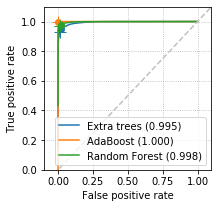

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/train_roc_extra-trees-adaboost-random-forest_comparison_x_-010_110_y_000_110.svg


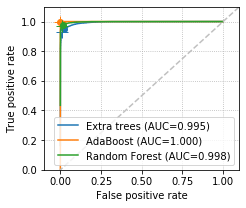

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/train_roc_extra-trees-adaboost-random-forest_comparison_marked_thresh_x_-010_110_y_000_110_3x3.svg


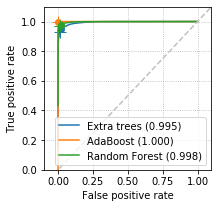

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/train_roc_extra-trees-adaboost-random-forest_comparison_marked_thresh_x_-010_110_y_000_110.svg


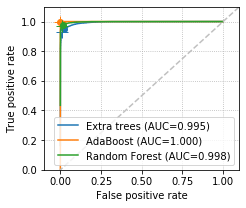

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/train_roc_extra-trees-adaboost-random-forest_comparison_x_-002_030_y_080_101_3x3.svg


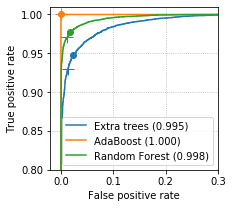

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/train_roc_extra-trees-adaboost-random-forest_comparison_x_-002_030_y_080_101.svg


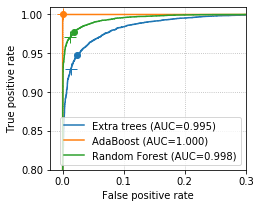

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/train_roc_extra-trees-adaboost-random-forest_comparison_marked_thresh_x_-002_030_y_080_101_3x3.svg


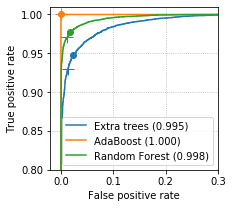

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/train_roc_extra-trees-adaboost-random-forest_comparison_marked_thresh_x_-002_030_y_080_101.svg


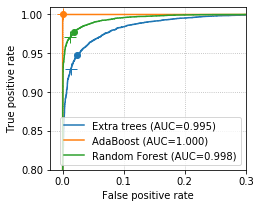

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/train_precision_recall_extra-trees-adaboost-random-forest_comparison.svg


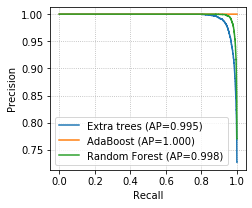

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/train_precision_recall_extra-trees-adaboost-random-forest_comparison_x_070_105_y_080_101.svg


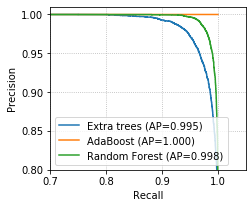

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/train_precision_recall_extra-trees-adaboost-random-forest_comparison_marked_thresh.svg


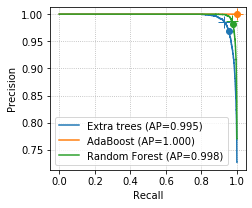

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/train_precision_recall_extra-trees-adaboost-random-forest_comparison_marked_thresh_x_070_105_y_080_101.svg


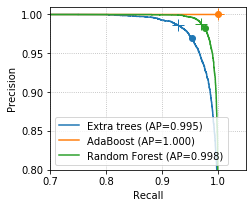

In [116]:
vis_roc_comparison_list_n(train_roc_curves, output_dir=data_snippets_dir_figures, prefix='train')
vis_precision_recall_comparison_list_n(train_pr_curves, output_dir=data_snippets_dir_figures, prefix='train')

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/roc_extra-trees-adaboost-random-forest_comparison_x_-010_110_y_000_110_3x3.svg


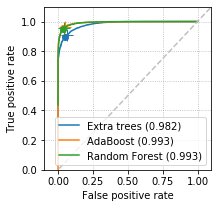

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/roc_extra-trees-adaboost-random-forest_comparison_x_-010_110_y_000_110.svg


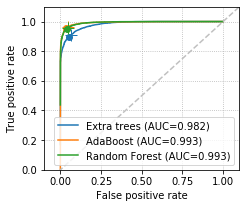

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/roc_extra-trees-adaboost-random-forest_comparison_marked_thresh_x_-010_110_y_000_110_3x3.svg


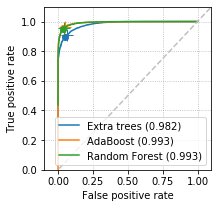

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/roc_extra-trees-adaboost-random-forest_comparison_marked_thresh_x_-010_110_y_000_110.svg


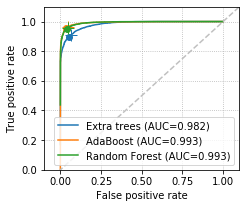

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/roc_extra-trees-adaboost-random-forest_comparison_x_-002_030_y_080_101_3x3.svg


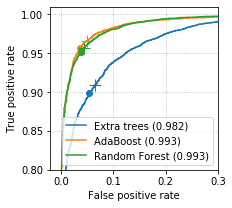

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/roc_extra-trees-adaboost-random-forest_comparison_x_-002_030_y_080_101.svg


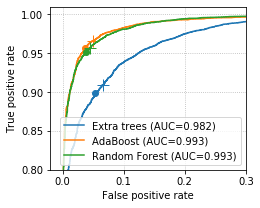

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/roc_extra-trees-adaboost-random-forest_comparison_marked_thresh_x_-002_030_y_080_101_3x3.svg


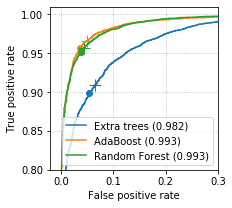

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/roc_extra-trees-adaboost-random-forest_comparison_marked_thresh_x_-002_030_y_080_101.svg


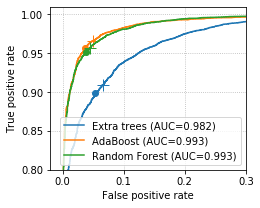

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/precision_recall_extra-trees-adaboost-random-forest_comparison.svg


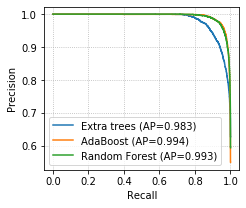

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/precision_recall_extra-trees-adaboost-random-forest_comparison_x_070_105_y_080_101.svg


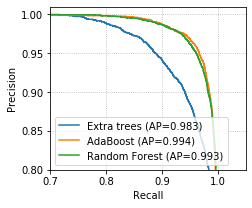

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/precision_recall_extra-trees-adaboost-random-forest_comparison_marked_thresh.svg


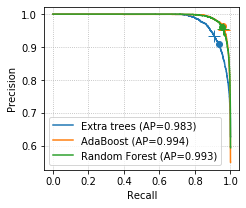

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/precision_recall_extra-trees-adaboost-random-forest_comparison_marked_thresh_x_070_105_y_080_101.svg


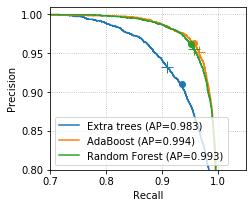

In [117]:
vis_roc_comparison_list_n(test_roc_curves, output_dir=data_snippets_dir_figures)
vis_precision_recall_comparison_list_n(test_pr_curves, output_dir=data_snippets_dir_figures)

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/utah_roc_extra-trees-adaboost-random-forest_comparison_x_-010_110_y_000_110_3x3.svg


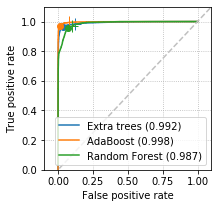

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/utah_roc_extra-trees-adaboost-random-forest_comparison_x_-010_110_y_000_110.svg


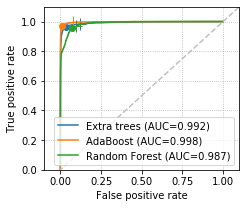

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/utah_roc_extra-trees-adaboost-random-forest_comparison_marked_thresh_x_-010_110_y_000_110_3x3.svg


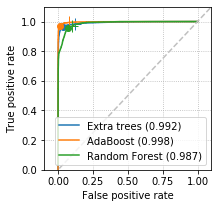

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/utah_roc_extra-trees-adaboost-random-forest_comparison_marked_thresh_x_-010_110_y_000_110.svg


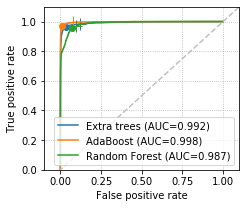

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/utah_roc_extra-trees-adaboost-random-forest_comparison_x_-002_030_y_080_101_3x3.svg


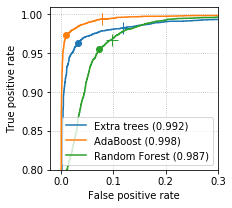

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/utah_roc_extra-trees-adaboost-random-forest_comparison_x_-002_030_y_080_101.svg


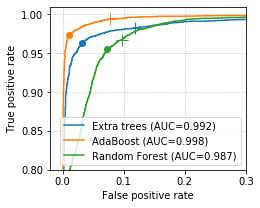

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/utah_roc_extra-trees-adaboost-random-forest_comparison_marked_thresh_x_-002_030_y_080_101_3x3.svg


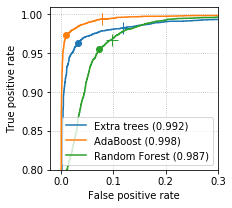

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/utah_roc_extra-trees-adaboost-random-forest_comparison_marked_thresh_x_-002_030_y_080_101.svg


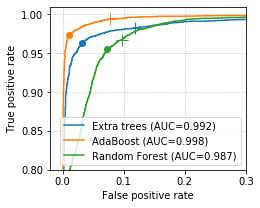

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/utah_precision_recall_extra-trees-adaboost-random-forest_comparison.svg


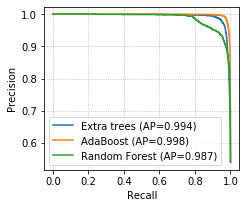

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/utah_precision_recall_extra-trees-adaboost-random-forest_comparison_x_070_105_y_080_101.svg


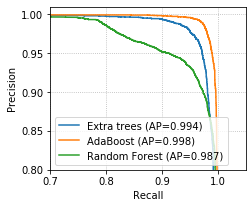

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/utah_precision_recall_extra-trees-adaboost-random-forest_comparison_marked_thresh.svg


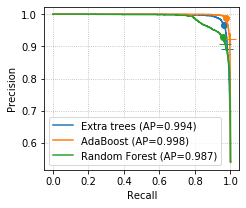

SAVING FIGURE: ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/utah_precision_recall_extra-trees-adaboost-random-forest_comparison_marked_thresh_x_070_105_y_080_101.svg


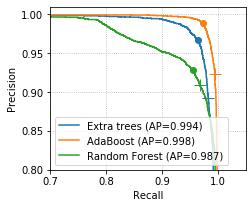

In [118]:
vis_roc_comparison_list_n(utah_roc_curves, output_dir=data_snippets_dir_figures, prefix='utah')
vis_precision_recall_comparison_list_n(utah_pr_curves, output_dir=data_snippets_dir_figures, prefix='utah')

## Distributions

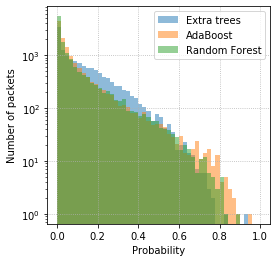

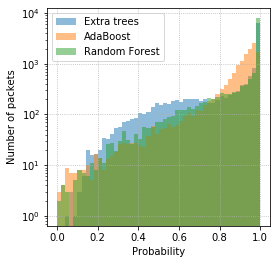

In [152]:
fig_names = ['noise', 'shower'] 

fig_d = {}
ax_d = {}

nbins = 50

for n in fig_names:
    fig_d[n], ax_d[n] = plt.subplots(figsize=(4,4))

for j, n in enumerate(fig_names):
#     print(n)
    for i, (cls_name, s) in enumerate(cls_dict.items()):
#         print(' ',cls_name)
        npz = np.load(s['test']['npz'])
        ax_d[n].hist(npz['y_pred_proba'][npz['y'] == j][:,1], bins=nbins, range=(0,1), label=s['label'], alpha=0.5)
        
for n in fig_names:
#     print(n)
    ax_d[n].set_yscale('log')
    ax_d[n].grid(linestyle=':')
    ax_d[n].legend()
    ax_d[n].set_ylabel('Number of packets')
    ax_d[n].set_xlabel('Probability')
    fig_d[n].savefig(os.path.join(data_snippets_dir,'{}_est_proba_classified.svg'.format(n)), dpi=150)
    
plt.show()    

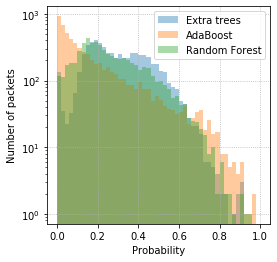

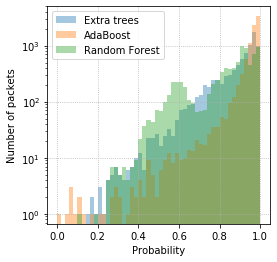

In [151]:
fig_names = ['noise', 'shower'] 

fig_d = {}
ax_d = {}

nbins = 50

for n in fig_names:
    fig_d[n], ax_d[n] = plt.subplots(figsize=(4,4))

for j, n in enumerate(fig_names):
#     print(n)
    for i, (cls_name, s) in enumerate(cls_dict.items()):
#         print(' ',cls_name)
        
        utah_df = pd.read_csv(
            s['utah']['tsv_gz'], sep='\t', #index_col=0, 
            usecols=[ manual_classification_class_number_column, s['utah']['est_column'], s['utah']['est_proba_column']],
            #nrows=100
        )

        utah_cls_any_df, utah_cls_shower_df, utah_cls_any_noise_df = get_utah_labeled_subsets(utah_df)

        y_utah = get_y_utah_from_cls_any_df(utah_cls_any_df)
        y_utah_pred_proba = utah_cls_any_df[s['utah']['est_proba_column']]
        
        ax_d[n].hist(y_utah_pred_proba[y_utah == j], bins=nbins, range=(0,1), label=s['label'], alpha=0.4)
                
for n in fig_names:
#     print(n)
    ax_d[n].set_yscale('log')
    ax_d[n].grid(linestyle=':')
    ax_d[n].legend()
    ax_d[n].set_ylabel('Number of packets')
    ax_d[n].set_xlabel('Probability')
    fig_d[n].savefig(os.path.join(data_snippets_dir,'{}_utah_est_proba_classified.svg'.format(n)), dpi=150)
    
plt.show()    

extra_trees
  noise


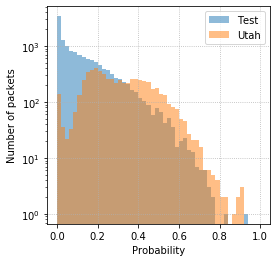

  shower


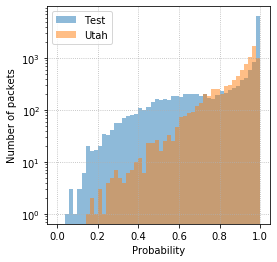

adaboost
  noise


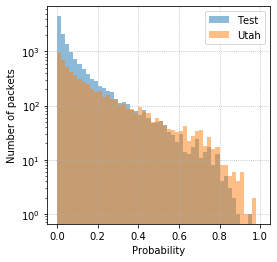

  shower


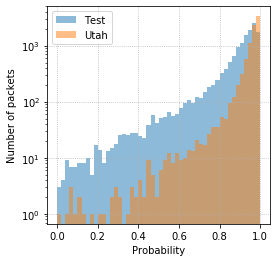

random_forest
  noise


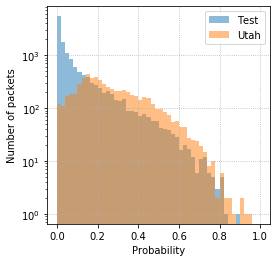

  shower


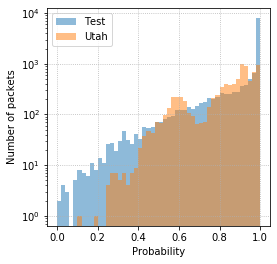

In [150]:
nbins=50

for i, (cls_name, s) in enumerate(cls_dict.items()):
    print(cls_name)


    npz = np.load(s['test']['npz'])

    utah_df = pd.read_csv(
        s['utah']['tsv_gz'], sep='\t', #index_col=0, 
        usecols=[ manual_classification_class_number_column, s['utah']['est_column'], s['utah']['est_proba_column']],
        #nrows=100
    )

    utah_cls_any_df, utah_cls_shower_df, utah_cls_any_noise_df = get_utah_labeled_subsets(utah_df)

    y_utah = get_y_utah_from_cls_any_df(utah_cls_any_df)
    y_utah_pred_proba = utah_cls_any_df[s['utah']['est_proba_column']]

    
    for j, n in enumerate(['noise', 'shower'] ):
        print(' ', n)
    
        fig, ax = plt.subplots(figsize=(4,4))

        ax.hist(npz['y_pred_proba'][npz['y'] == j][:,1], bins=nbins, range=(0,1), label='Test', alpha=0.5)
        ax.hist(y_utah_pred_proba[y_utah == j], bins=nbins, range=(0,1), label='Utah', alpha=0.5)

        ax.set_yscale('log')
        ax.grid(linestyle=':')
        ax.legend()
        ax.set_ylabel('Number of packets')
        ax.set_xlabel('Probability')
        fig.savefig(os.path.join(data_snippets_dir,'{}_est_proba_classified_comparison_test_utah.svg'.format(n)), dpi=150)
    
        plt.show()    

## Feature importance

In [287]:
learning_data__all_var_th_sc_columns_sorted_table_dict = {}
learning_data__all_var_th_sc_columns_sorted_table_outer_dict = {}
learning_data__rfecv_var_th_sc_columns_sorted_table_outer_dict = {}
learning_data__rfecv_var_th_sc_columns_sorted_table_dict = {}


for cls_name, s in feature_scores.items():
    print(cls_name)
    
    learning_data__all_var_th_sc_columns_sorted_table = \
        pd.read_csv(s['all_tsv'], sep='\t', index_col=0)
    
    learning_data__all_var_th_sc_columns_sorted_table_outer = \
        pd.read_csv(s['all_outer_tsv'], sep='\t', index_col=0)
    
    learning_data__rfecv_var_th_sc_columns_sorted_table_outer = \
        pd.read_csv(s['rfecv_outer_tsv'], sep='\t', index_col=0)
    
    learning_data__rfecv_var_th_sc_columns_sorted_table = \
        pd.read_csv(s['rfecv_tsv'], sep='\t', index_col=0)
    
    print('  len(learning_data__rfecv_var_th_sc_columns_sorted_table_outer) =', len(learning_data__rfecv_var_th_sc_columns_sorted_table_outer))
    print('  len(learning_data__rfecv_var_th_sc_columns_sorted_table) =', len(learning_data__rfecv_var_th_sc_columns_sorted_table))
    print('  learning_data__rfecv_var_th_sc_columns_sorted_table_outer:')
    display(learning_data__rfecv_var_th_sc_columns_sorted_table_outer.head())
    
    learning_data__all_var_th_sc_columns_sorted_table_dict[cls_name] = learning_data__all_var_th_sc_columns_sorted_table
    learning_data__all_var_th_sc_columns_sorted_table_outer_dict[cls_name] = learning_data__all_var_th_sc_columns_sorted_table_outer
    learning_data__rfecv_var_th_sc_columns_sorted_table_outer_dict[cls_name] = learning_data__rfecv_var_th_sc_columns_sorted_table_outer
    learning_data__rfecv_var_th_sc_columns_sorted_table_dict[cls_name] = learning_data__rfecv_var_th_sc_columns_sorted_table
    

extra_trees
  len(learning_data__rfecv_var_th_sc_columns_sorted_table_outer) = 842
  len(learning_data__rfecv_var_th_sc_columns_sorted_table) = 118
  learning_data__rfecv_var_th_sc_columns_sorted_table_outer:


,feature,score_f_classif,score_chi2,score_mutual_classif,score_extr_tr,score_std_extr_tr,score_extr_tr_lim,score_std_extr_tr_lim,score_rndfrst,score_std_rndfrst,score_adabst,score_std_adabst,score_rfecv_extr_tr,score_std_rfecv_extr_tr
0,proc2_x_y_hough_peak_thr1_line_clusters_count,19338.393529,179.469432,0.282528,0.012375,0.037619,0.015655,0.050590,0.022620,0.053965,0.023438,0.151288,0.030792,0.056286
9,proc1_x_y_hough_peak_thr1_line_clusters_max_ar...,13163.964051,1581.820443,0.251769,0.006321,0.019662,0.009588,0.022428,0.021233,0.076865,0.000000,0.000000,0.027228,0.074359
11,proc1_x_y_hough_peak_thr1_line_clusters_max_su...,12909.188394,1584.649585,0.244933,0.010595,0.037757,0.014001,0.047709,0.020702,0.075864,0.000000,0.000000,0.026676,0.065744
6,proc3_x_y_hough_peak_thr1_line_clusters_count,14591.117461,45.660529,0.244802,0.007680,0.014937,0.007379,0.016085,0.015601,0.053442,0.007812,0.088042,0.022557,0.061829
2,alt1_x_y_hough_peak_thr1_line_clusters_max_are...,17645.582937,1801.163073,0.264865,0.004253,0.016395,0.007393,0.024986,0.008697,0.047931,0.000000,0.000000,0.022546,0.067507


adaboost
  len(learning_data__rfecv_var_th_sc_columns_sorted_table_outer) = 842
  len(learning_data__rfecv_var_th_sc_columns_sorted_table) = 141
  learning_data__rfecv_var_th_sc_columns_sorted_table_outer:


,feature,score_f_classif,score_chi2,score_mutual_classif,score_extr_tr,score_std_extr_tr,score_extr_tr_lim,score_std_extr_tr_lim,score_rndfrst,score_std_rndfrst,score_rndfrst_lim,score_std_rndfrst_lim,score_adabst_nl,score_std_adabst_nl,score_adabst_64_est_d_8,score_std_adabst_64_est_d_8,score_adabst_128_est_d_32,score_std_adabst_128_est_d_32,score_rfecv_adaboost,score_std_rfecv_adaboost
839,trg_max,0.093384,24.431388,0.105696,0.004762,0.002385,0.004229,0.005537,0.014818,0.012323,0.015862,0.012534,0.045220,0.031771,0.045220,0.031771,0.035111,0.067244,0.053466,0.028223
775,proc1_x_y_clusters_max_peak_clu_size,70.971478,1.369257,0.269422,0.005360,0.014330,0.006048,0.016924,0.012792,0.015122,0.014705,0.021620,0.016645,0.024245,0.016645,0.024245,0.012828,0.055730,0.020902,0.029403
0,proc2_x_y_hough_peak_thr1_line_clusters_count,19338.393529,179.469432,0.283641,0.012375,0.037619,0.015655,0.050590,0.022598,0.054063,0.028320,0.068456,0.014529,0.057656,0.014529,0.057656,0.009048,0.048288,0.017042,0.057181
822,orig_mean,2.648526,0.000000,0.274140,0.001326,0.001677,0.001001,0.002558,0.003238,0.003474,0.003377,0.003786,0.013270,0.021405,0.013270,0.021405,0.011331,0.045667,0.016817,0.022241
772,proc1_x_y_clusters_sizes_max,71.847719,0.001503,0.266027,0.008230,0.019236,0.009232,0.026842,0.012807,0.013737,0.016846,0.022592,0.014001,0.021329,0.014001,0.021329,0.010046,0.039284,0.016409,0.025462


randomforest
  len(learning_data__rfecv_var_th_sc_columns_sorted_table_outer) = 842
  len(learning_data__rfecv_var_th_sc_columns_sorted_table) = 81
  learning_data__rfecv_var_th_sc_columns_sorted_table_outer:


,feature,score_f_classif,score_chi2,score_mutual_classif,score_extr_tr,score_std_extr_tr,score_extr_tr_lim,score_std_extr_tr_lim,score_rndfrst,score_std_rndfrst,score_rndfrst_lim,score_std_rndfrst_lim,score_adabst_nl,score_std_adabst_nl,score_rfecv_randomforest,score_std_rfecv_randomforest
0,proc2_x_y_hough_peak_thr1_line_clusters_count,19338.393529,179.469432,0.282528,0.012375,0.037619,0.015655,0.050590,0.022620,0.053965,0.028320,0.068456,0.023438,0.151288,0.089032,0.145662
18,alt1_x_y_hough_peak_thr1_line_clusters_count,11082.368406,32.979735,0.212629,0.005396,0.017965,0.006547,0.025039,0.010200,0.051844,0.013150,0.063159,0.000000,0.000000,0.044060,0.120035
839,trg_max,0.093384,24.431388,0.106195,0.004762,0.002385,0.004229,0.005537,0.014757,0.012390,0.015862,0.012534,0.117188,0.321644,0.037714,0.016620
7,proc1_x_y_hough_peak_thr1_line_clusters_clu_wi...,13493.296652,158.629745,0.258400,0.010037,0.036660,0.016310,0.053605,0.006820,0.022203,0.004791,0.018405,0.007812,0.088042,0.037308,0.113531
9,proc1_x_y_hough_peak_thr1_line_clusters_max_ar...,13163.964051,1581.820443,0.251769,0.006321,0.019662,0.009588,0.022428,0.021233,0.076865,0.025626,0.093385,0.000000,0.000000,0.031338,0.102481


In [301]:
#learning_data__all_var_th_sc_columns_sorted_table_joined, learning_data__all_var_th_sc_columns_sorted_table_outer_joined, \
learning_data__rfecv_var_th_sc_columns_sorted_table_outer_joined, learning_data__rfecv_var_th_sc_columns_sorted_table_joined = [
    merge_feature_score_table_dfs_multiple(
        {cls_name: df[[c for c in df.columns if 'rfecv' in c] + ['feature']] for cls_name, df in df_dict.items()}
    ) for df_dict in (
        learning_data__rfecv_var_th_sc_columns_sorted_table_outer_dict, 
        learning_data__rfecv_var_th_sc_columns_sorted_table_dict
    )
]


o_df = learning_data__rfecv_var_th_sc_columns_sorted_table_outer_joined
df_dict = learning_data__rfecv_var_th_sc_columns_sorted_table_outer_dict

unique_ser_dict = {}
for cls_name, df in df_dict.items():
    for c in df.columns:
        if c in o_df.columns:
            nc = c
            i = 1
            while nc in df.columns and nc in o_df.columns and not o_df[nc].equals(df[c]):
                nc = '{}_{}'.format(c, i)
                i += 1
            if nc not in o_df.columns:
                
            
            continue
        else:
            assert len(o_df) == len(df)
            o_df[c] = df[c]
            
#         if c not in unique_ser_dict


transl_sub_dict = {
    'extr_tr': 'extra_trees'
}

for df in [
        learning_data__rfecv_var_th_sc_columns_sorted_table_outer_joined, 
        learning_data__rfecv_var_th_sc_columns_sorted_table_joined
]:
    for k,v in transl_sub_dict.items():
        d = {c: c.replace(k,v) for c in df.columns if k in c}
        if len(d) <= 0:
            continue
        df.rename(columns=d, inplace=True)

dict_keys(['extra_trees', 'adaboost', 'randomforest'])

In [302]:
learning_data__rfecv_var_th_sc_columns_sorted_table_outer_joined

,score_rfecv_extra_trees,score_std_rfecv_extra_trees,feature,score_rfecv_adaboost,score_std_rfecv_adaboost,score_rfecv_randomforest,score_std_rfecv_randomforest
0,0.030792,0.056286,proc2_x_y_hough_peak_thr1_line_clusters_count,0.017042,0.057181,0.089032,0.145662
1,0.027228,0.074359,proc1_x_y_hough_peak_thr1_line_clusters_max_ar...,0.000000,0.000000,0.031338,0.102481
2,0.026676,0.065744,proc1_x_y_hough_peak_thr1_line_clusters_max_su...,0.000000,0.000000,0.030495,0.100679
3,0.022557,0.061829,proc3_x_y_hough_peak_thr1_line_clusters_count,0.011525,0.016213,0.031212,0.072105
4,0.022546,0.067507,alt1_x_y_hough_peak_thr1_line_clusters_max_are...,0.000000,0.000000,0.000000,0.000000
5,0.020164,0.053210,proc1_x_y_hough_peak_thr1_line_clusters_clu_wi...,0.007134,0.018515,0.037308,0.113531
6,0.019907,0.049696,proc1_x_y_hough_peak_thr1_line_clusters_max_si...,0.000000,0.000000,0.028719,0.099990
7,0.019600,0.064246,alt1_x_y_hough_peak_thr1_line_clusters_max_pea...,0.005102,0.009819,0.000000,0.000000
8,0.019401,0.063089,alt1_x_y_hough_peak_thr1_line_clusters_max_siz...,0.000000,0.000000,0.000000,0.000000
9,0.019028,0.067907,proc2_x_y_hough_peak_thr1_line_clusters_clu_wi...,0.000000,0.000000,0.003891,0.014091


### Correlations

Extra trees classifier
  ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/feature_importance_methods_feature_score_plot_extra-trees-classifier.svg
Random forest classifier
  ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/feature_importance_methods_feature_score_plot_random-forest-classifier.svg
Adaboost classifier (depth=8)
  ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/feature_importance_methods_feature_score_plot_adaboost-classifier-depth-8.svg

ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/feature_importance_methods_feature_score_plot_all_methods.svg


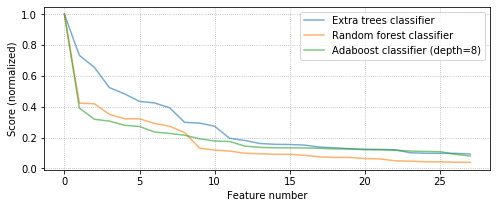

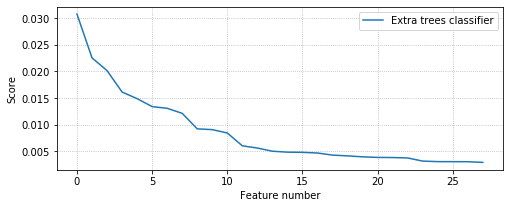

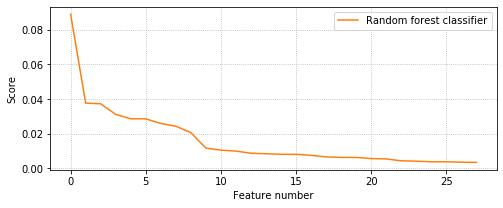

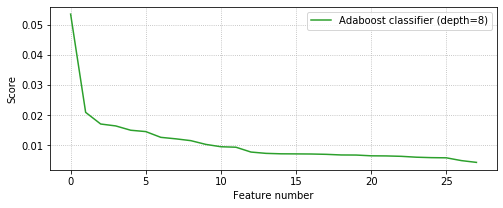

In [278]:
table_df = learning_data__rfecv_var_th_sc_columns_sorted_table_joined
score_col_format = 'score_rfecv_{}'


fig_common, ax_common = plt.subplots(1)
fig_common.set_size_inches(8,3)
ax_common.grid(linestyle=':')
# ax_common.set_title('Comparison of function shapes')
ax_common.set_ylabel('Score (normalized)')
ax_common.set_xlabel('Feature number')

for (label, col_name_base, linestyle, marker), c in zip((
    ('Extra trees classifier', 'extra_trees', '-', ''),
    ('Random forest classifier', 'randomforest', '-', ''),
    ('Adaboost classifier (depth=8)', 'adaboost', '-', ''),
), plt.rcParams['axes.prop_cycle']() ):
#     if not label.startswith('Univariate'):
    score_col = score_col_format.format(col_name_base)

    print(label)
    
    _table_df = table_df.sort_values(score_col, ascending=False).reset_index()
    
    plt.figure(figsize=(8,3))
    plt.grid(linestyle=':')
#     plt.title("{}: Feature scores".format(label))
    plt.plot(_table_df.index, _table_df[score_col], color=c['color'], linestyle=linestyle, marker=marker, label=label)
    plt.xlabel('Feature number')
    plt.ylabel('Score')
    plt.legend()
    
    p = os.path.join(
        data_snippets_dir, 
        'figures', 'feature_importance_methods_feature_score_plot_{}.svg'.format(slugify(label)))
    
    print(' ', p)
    
    plt.savefig(p, dpi=150)
    
    ax_common.plot(
        _table_df.index, _table_df[score_col]/np.max(_table_df[score_col]), 
        label=label, color=c['color'], linestyle=linestyle, marker=marker, alpha=0.6)
        
ax_common.legend()

p = os.path.join(data_snippets_dir_figures, 'feature_importance_methods_feature_score_plot_all_methods.svg')

print()
print(p)

fig_common.savefig(p, dpi=150)

plt.show()

In [292]:
def feature_importance_methods_feature_score_plot_sorted(
        table_df, columns_list, score_col_format = 'score_rfecv_{}', individual_tables_dict=None,
        figsize=(6,3),
        fig_grid_commot_ylabel_xoffset = 0.03 #0.06,
        ,savefig=True, show=True
):

    for (label, col_name_base, linestyle, marker), c in zip(columns_list, plt.rcParams['axes.prop_cycle']() ):

        sortby_column = score_col_format.format(col_name_base)

        num_feat_label = None
        num_feat = None
        simp_label = None

        if individual_tables_dict is not None:
            num_feat = len(individual_tables_dict[col_name_base])

            simp_label = label
            m = re.search(r'([a-zA-Z0-9_ -]+[a-zA-Z0-9_])', label)
            if m:
                simp_label = m.group(1)

            num_feat_label = '#RFECV feat. ({})'.format(simp_label)

        print('Features sorted by:', sortby_column)
        print('  Num features:', num_feat)

        _table_df = table_df.sort_values(sortby_column, ascending=False).reset_index()

        fig_common, ax_common = plt.subplots(1)
        fig_common.set_size_inches(figsize)
        ax_common.grid(linestyle=':')
        ax_common.set_ylabel('Score (normalized)')
        ax_common.set_xlabel('Feature number')

        fig_grid_common, axs = plt.subplots(len(columns_list), 1, sharex=True)
        fig_grid_common.set_size_inches(figsize[0],figsize[1]*len(columns_list))

        for i, ((i_label, i_col_name_base, i_linestyle, i_marker), i_c) in enumerate(zip(columns_list, plt.rcParams['axes.prop_cycle']() )):

            score_col = score_col_format.format(i_col_name_base)

            axs[i].plot(range(len(_table_df)), #df_sorted_by_col.index, 
                        _table_df[score_col]/np.max(_table_df[score_col]),
                        label=i_label, color=i_c['color'], linewidth=0.75,)
            axs[i].grid(linestyle=':')
            axs[i].set_ylim(-0.1,1.1)
            if num_feat is not None:
                axs[i].plot([num_feat]*2, axs[i].get_ylim(), linestyle='--', linewidth=0.5, color='red', alpha=0.8, label=num_feat_label, zorder=1)
            axs[i].legend(loc='upper right')

            ax_common.plot(
                _table_df.index, _table_df[score_col]/np.max(_table_df[score_col]), 
                label=i_label, color=i_c['color'], linestyle=i_linestyle, marker=i_marker, alpha=0.7,
                zorder=2 if i_col_name_base != col_name_base else 3, 
                linewidth=0.05
            )

        axs[i].set_xlabel('Feature number')

        ylim = ax_common.get_ylim()

        if num_feat is not None:
            ax_common.plot([num_feat]*2, ylim, linestyle='--', linewidth=0.5, color='red', alpha=0.8, label=num_feat_label, zorder=1)

        ax_common.set_ylim(ylim)

        ax_common.legend()

        fig_grid_common.text(fig_grid_commot_ylabel_xoffset, 0.5, 'Score (normalized)', va='center', rotation='vertical')
        
        if savefig:
            p = os.path.join(
                data_snippets_dir_figures, 
                'feature_importance_methods_feature_score_plot_{}_sorted_by_{}.svg'.format(
                    slugify(i_label), slugify(label))
            )

            print(' ', p)

            fig_common.savefig(p, dpi=150)

            p = os.path.join(
                data_snippets_dir_figures,
                'feature_importance_methods_sorted_by_{}_plot.svg'.format(slugify(label))
            )

            print(' ', p)

            fig_grid_common.savefig(p, dpi=150)
        
        if show:
            plt.show()

Features sorted by: score_rfecv_extra_trees
  Num features: 118
  ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/feature_importance_methods_feature_score_plot_adaboost-classifier-depth-8_sorted_by_extra-trees-classifier.svg
  ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/feature_importance_methods_sorted_by_extra-trees-classifier_plot.svg


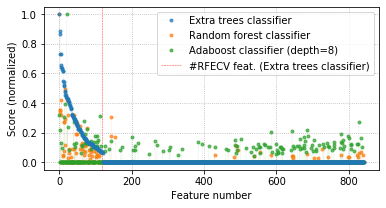

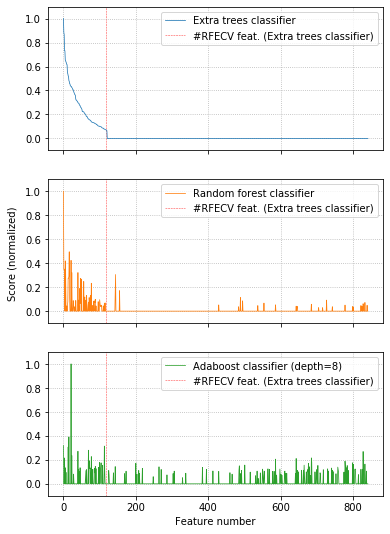

Features sorted by: score_rfecv_randomforest
  Num features: 81
  ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/feature_importance_methods_feature_score_plot_adaboost-classifier-depth-8_sorted_by_random-forest-classifier.svg
  ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/feature_importance_methods_sorted_by_random-forest-classifier_plot.svg


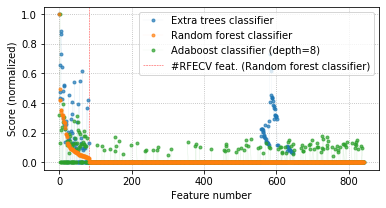

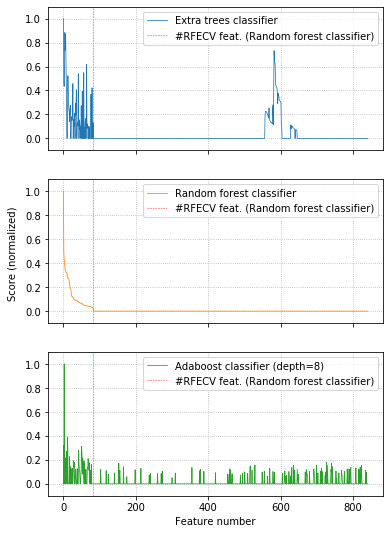

Features sorted by: score_rfecv_adaboost
  Num features: 141
  ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/feature_importance_methods_feature_score_plot_adaboost-classifier-depth-8_sorted_by_adaboost-classifier-depth-8.svg
  ver4_machine_learning_w_labeled_flight_20200415_2_variant_comparisons_from_exports/figures/feature_importance_methods_sorted_by_adaboost-classifier-depth-8_plot.svg


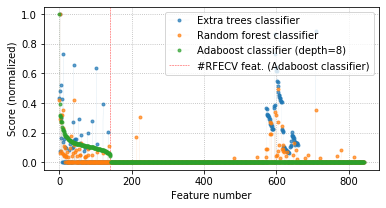

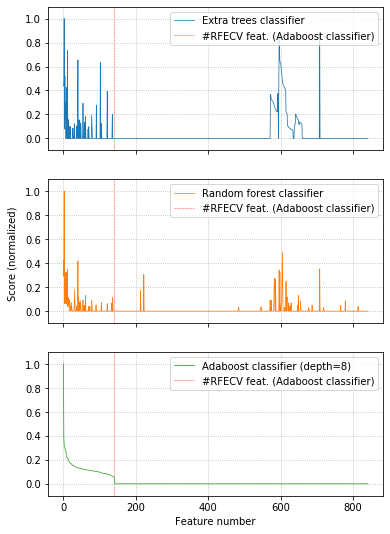

In [285]:
table_df = learning_data__rfecv_var_th_sc_columns_sorted_table_outer_joined
individual_tables_dict = learning_data__rfecv_var_th_sc_columns_sorted_table_dict
figsize = (6,3)
fig_grid_commot_ylabel_xoffset = 0.03 #0.06

columns_list = (
    ('Extra trees classifier', 'extra_trees', '-', '.'),
    ('Random forest classifier', 'randomforest', '-', '.'),
    ('Adaboost classifier (depth=8)', 'adaboost', '-', '.'),
)

feature_importance_methods_feature_score_plot_sorted(
        table_df, columns_list, 
        score_col_format = 'score_rfecv_{}', 
        individual_tables_dict=individual_tables_dict,
        figsize=(6,3),
        fig_grid_commot_ylabel_xoffset = 0.03 #0.06
)

In [299]:
learning_data__rfecv_var_th_sc_columns_sorted_table_outer_joined.head()

,score_rfecv_extra_trees,score_std_rfecv_extra_trees,feature,score_rfecv_adaboost,score_std_rfecv_adaboost,score_rfecv_randomforest,score_std_rfecv_randomforest
0,0.030792,0.056286,proc2_x_y_hough_peak_thr1_line_clusters_count,0.017042,0.057181,0.089032,0.145662
1,0.027228,0.074359,proc1_x_y_hough_peak_thr1_line_clusters_max_ar...,0.000000,0.000000,0.031338,0.102481
2,0.026676,0.065744,proc1_x_y_hough_peak_thr1_line_clusters_max_su...,0.000000,0.000000,0.030495,0.100679
3,0.022557,0.061829,proc3_x_y_hough_peak_thr1_line_clusters_count,0.011525,0.016213,0.031212,0.072105
4,0.022546,0.067507,alt1_x_y_hough_peak_thr1_line_clusters_max_are...,0.000000,0.000000,0.000000,0.000000


In [298]:
table_df = learning_data__rfecv_var_th_sc_columns_sorted_table_outer_joined # learning_data__all_var_th_sc_columns_sorted_table_outer #
individual_tables_dict = None
figsize = (6,3)
fig_grid_commot_ylabel_xoffset = 0.03 #0.06

columns_list = (
    ('Extra trees classifier', 'extr_tr_lim', '-', '.'),
    ('Random forest classifier', 'rndfrst_lim', '-', '.'),
#     ('Adaboost classifier (depth=8)', 'rfecv_adaboost', '-', '.'),
)

feature_importance_methods_feature_score_plot_sorted(
        table_df, columns_list, 
        score_col_format = 'score_{}', 
        individual_tables_dict=individual_tables_dict,
        figsize=(6,3),
        fig_grid_commot_ylabel_xoffset = 0.03 #0.06
        , savefig=False
)

Features sorted by: score_extr_tr_lim
  Num features: None


KeyError: 'score_extr_tr_lim'

In [ ]:
plt.close('all')
corr = corrcoef_score_columns(learning_data__all_var_th_sc_columns_sorted_table)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask = (~mask).T
sns.heatmap(corr, mask=mask, square=True, cmap='inferno', annot=True, cbar_kws={'label': 'correlation coeff.'})
plt.gcf().set_size_inches(9,9)
plt.setp(plt.gca().xaxis.get_majorticklabels(), rotation=45, ha="right")
plt.savefig(os.path.join(data_snippets_dir, 'figures', 'feature_importance_methods_correlation_coeffs.svg'), dpi=150)
plt.show()